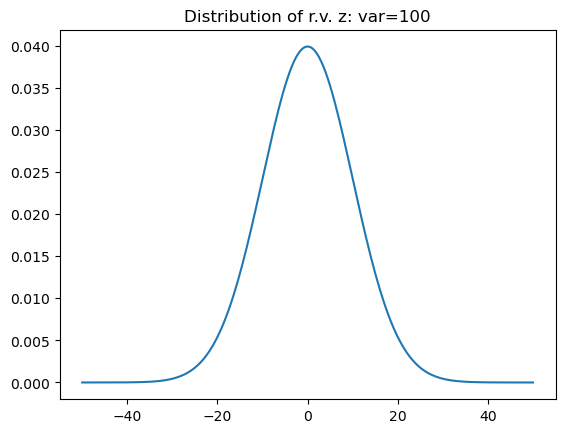

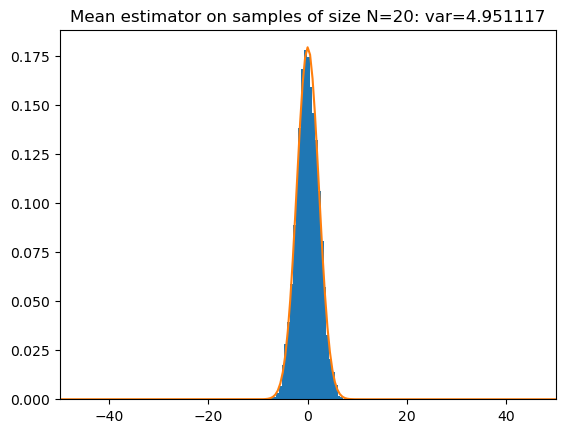

Variance of mu_hat: 4.951117
Theoretical variance: 5.000000


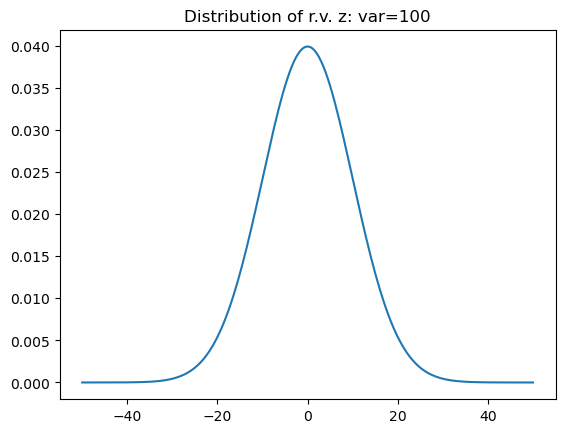

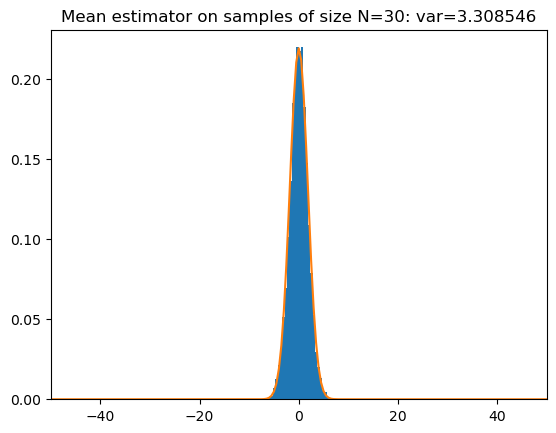

Variance of mu_hat: 3.308546
Theoretical variance: 3.333333


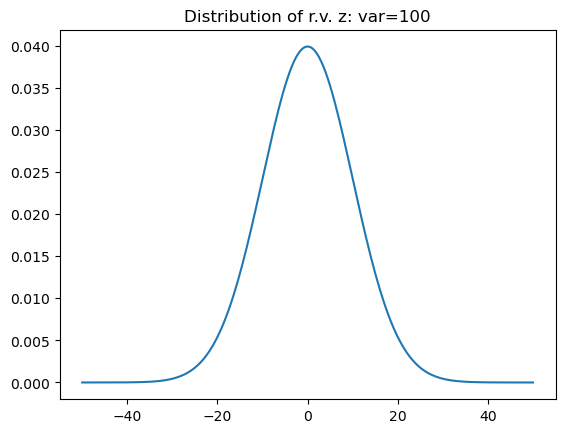

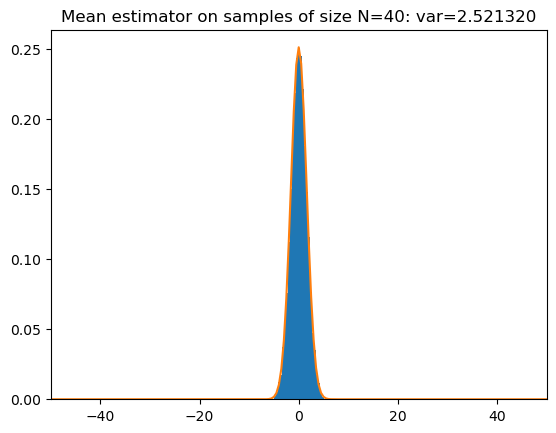

Variance of mu_hat: 2.521320
Theoretical variance: 2.500000


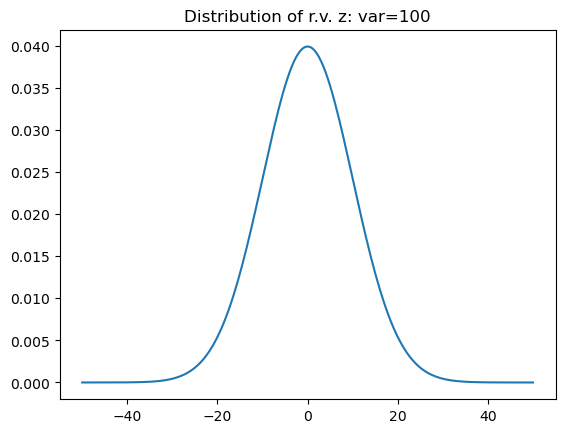

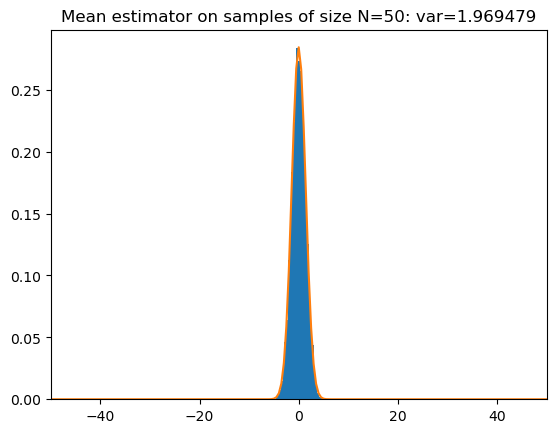

Variance of mu_hat: 1.969479
Theoretical variance: 2.000000


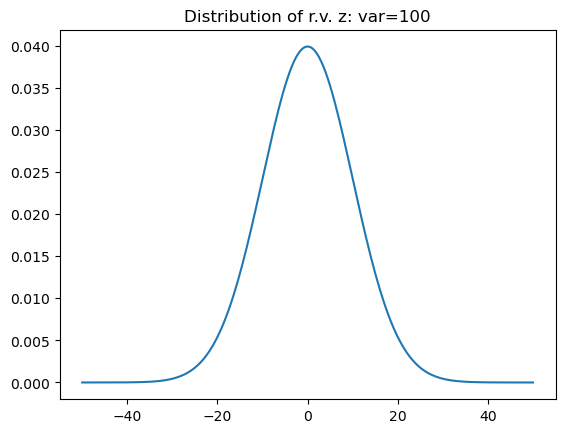

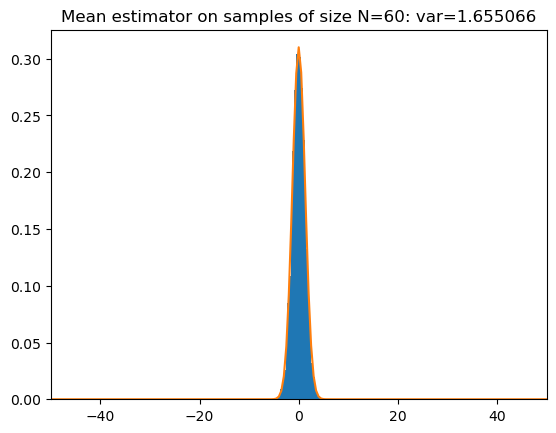

Variance of mu_hat: 1.655066
Theoretical variance: 1.666667


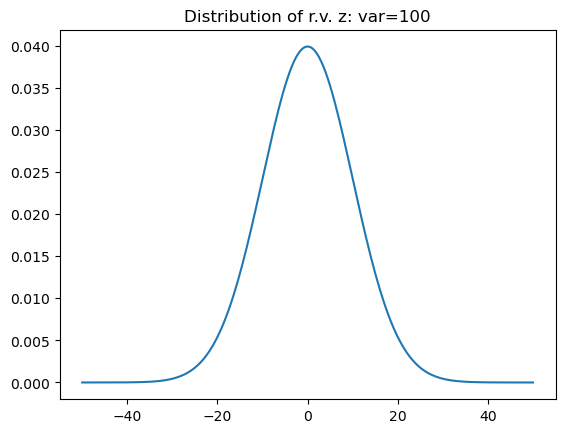

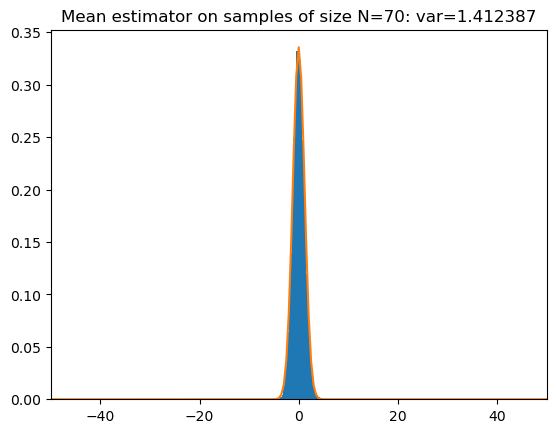

Variance of mu_hat: 1.412387
Theoretical variance: 1.428571


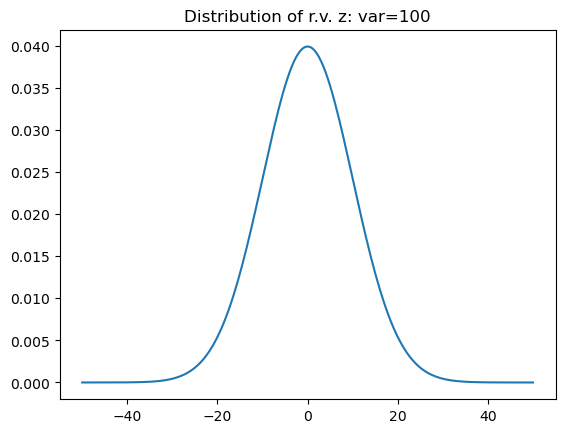

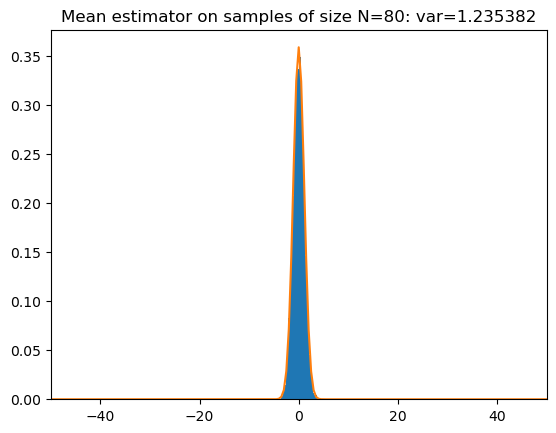

Variance of mu_hat: 1.235382
Theoretical variance: 1.250000


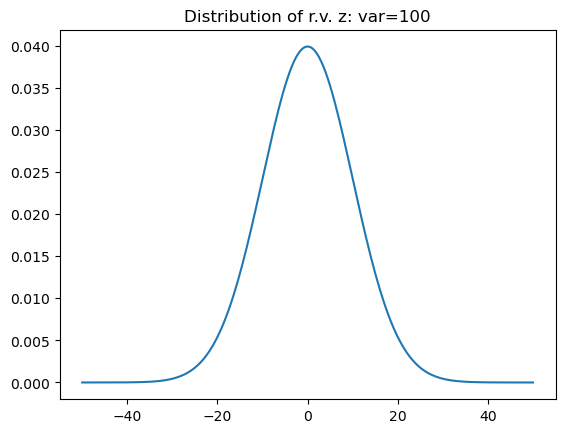

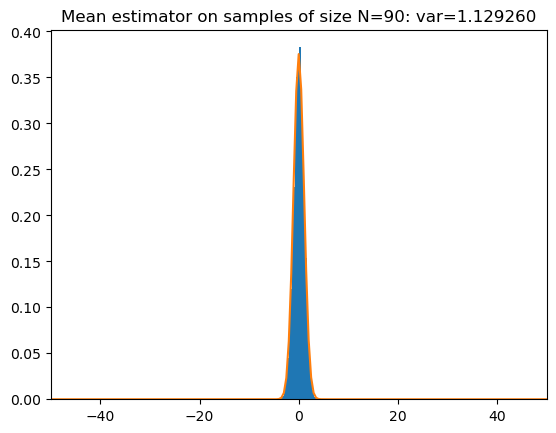

Variance of mu_hat: 1.129260
Theoretical variance: 1.111111


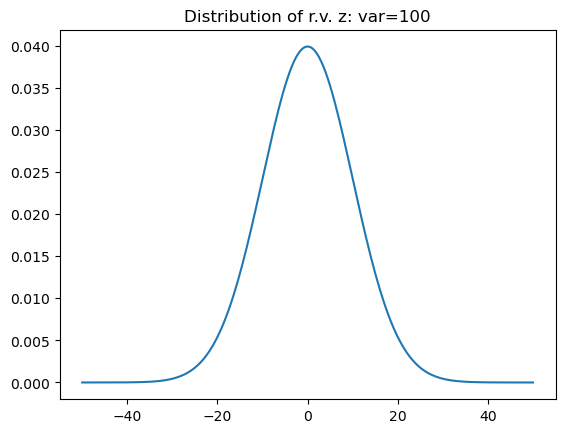

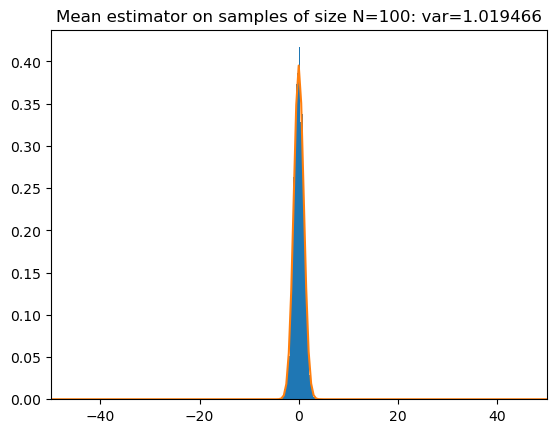

Variance of mu_hat: 1.019466
Theoretical variance: 1.000000


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.ion()  # Turn on interactive mode

for N in range(20, 101, 10):
    mu = 0
    sdev = 10
    R = 10000
    
    I = np.arange(-50, 50.5, 0.5)
    p = norm.pdf(I, loc=mu, scale=sdev)
    
    plt.figure()
    plt.plot(I, p)
    plt.title(f"Distribution of r.v. z: var={sdev**2}")
    plt.show()
    
    mu_hat = np.zeros((R, 1))
    for r in range(R):
        D = np.random.normal(loc=mu, scale=sdev, size=N)
        mu_hat[r, 0] = np.mean(D)
    
    plt.figure()
    plt.hist(mu_hat, density=True, bins=30)
    plt.title(f"Mean estimator on samples of size N={N}: var={np.var(mu_hat):.6f}")
    plt.xlim(min(I), max(I))
    
    p_mu_hat = norm.pdf(I, loc=np.mean(mu_hat), scale=np.sqrt(np.var(mu_hat)))
    plt.plot(I, p_mu_hat)
    plt.show()
    
    print(f"Variance of mu_hat: {np.var(mu_hat):.6f}")
    print(f"Theoretical variance: {sdev**2/N:.6f}")
    
    plt.pause(1)  # Pause to allow time for plot to be displayed

plt.ioff()  # Turn off interactive mode
plt.show()  # Keep the plots open



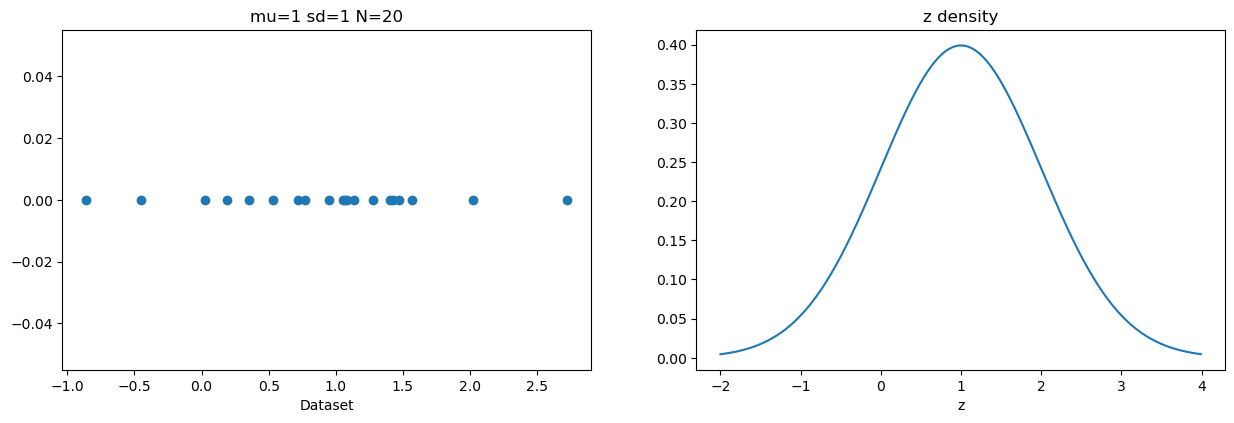

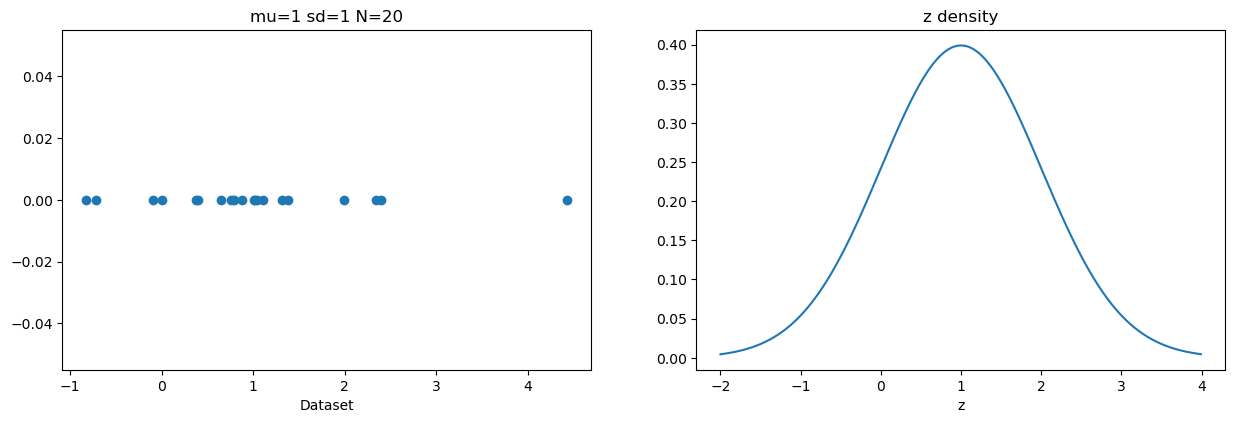

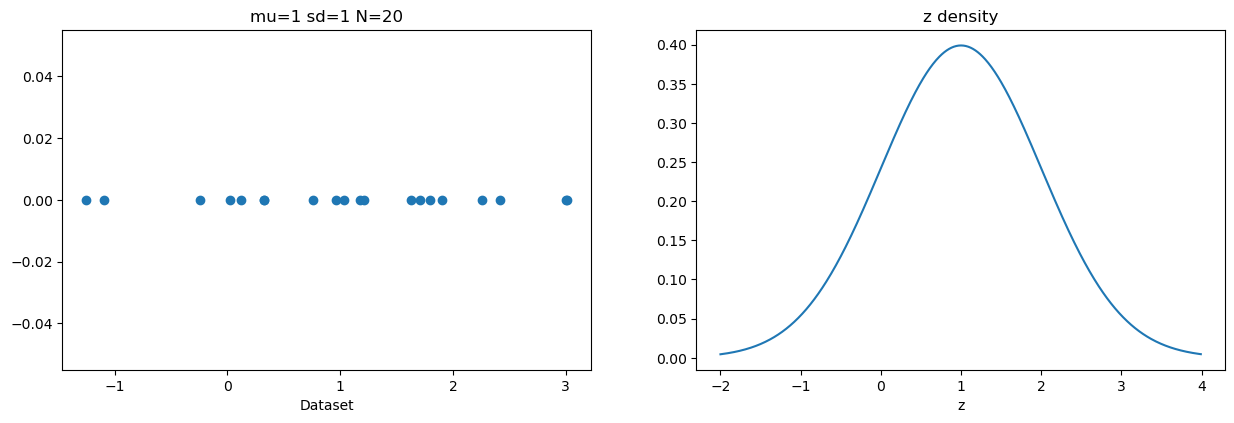

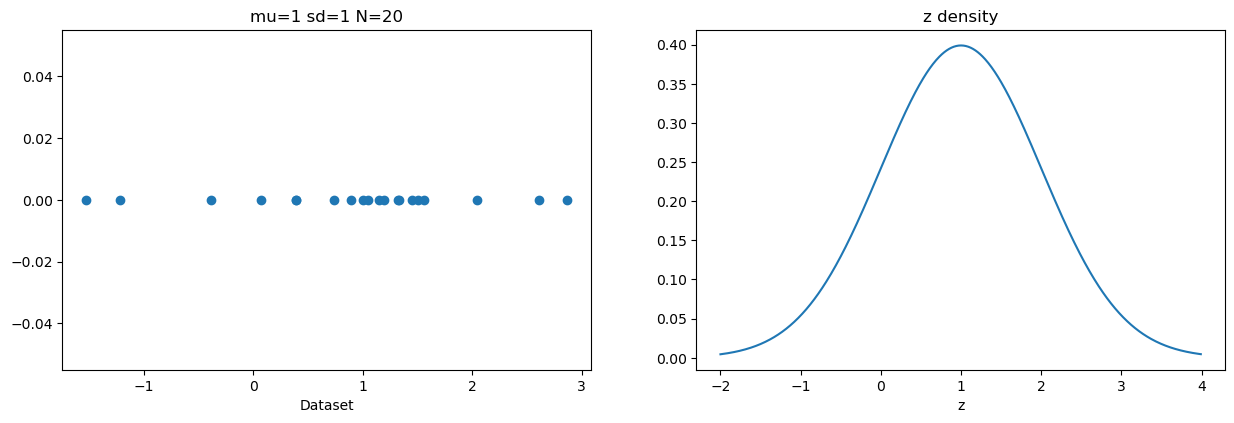

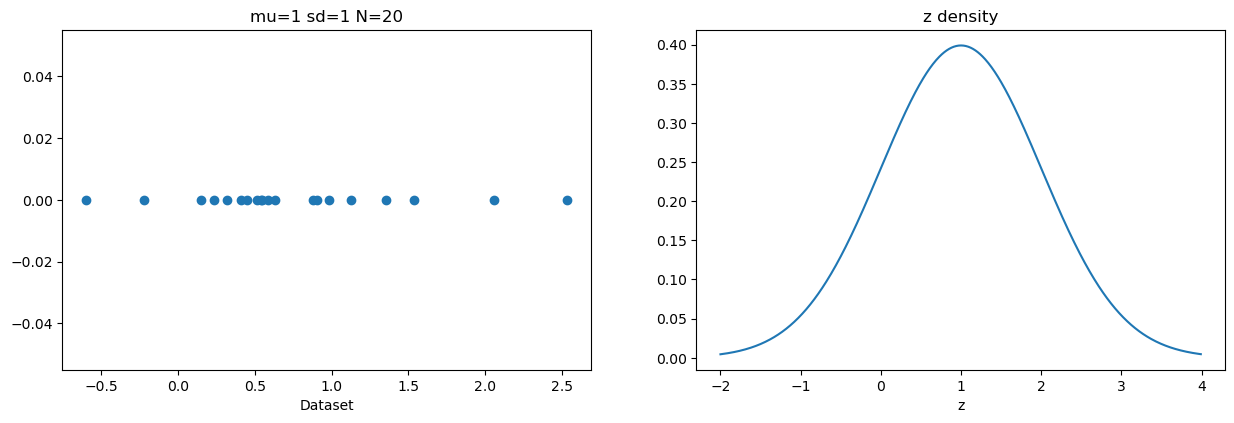

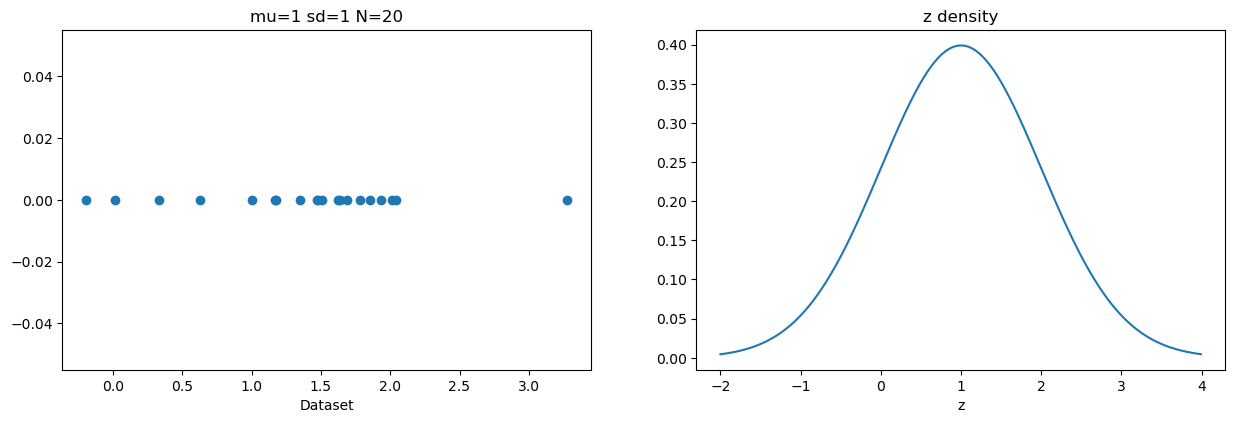

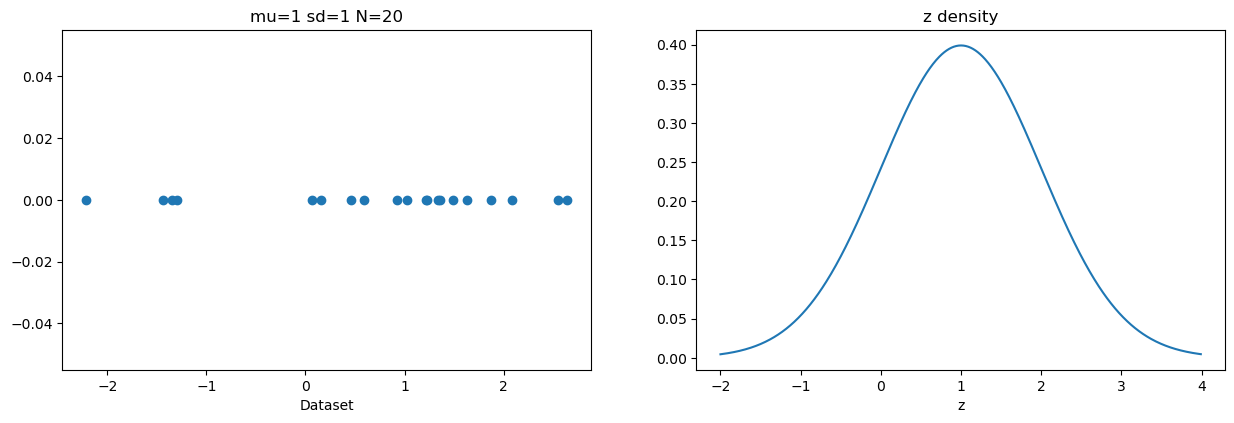

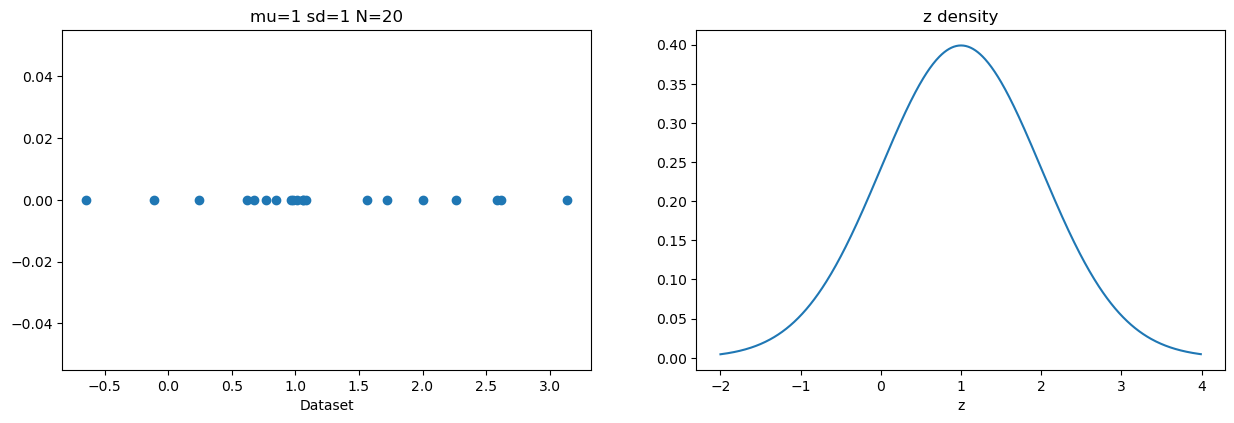

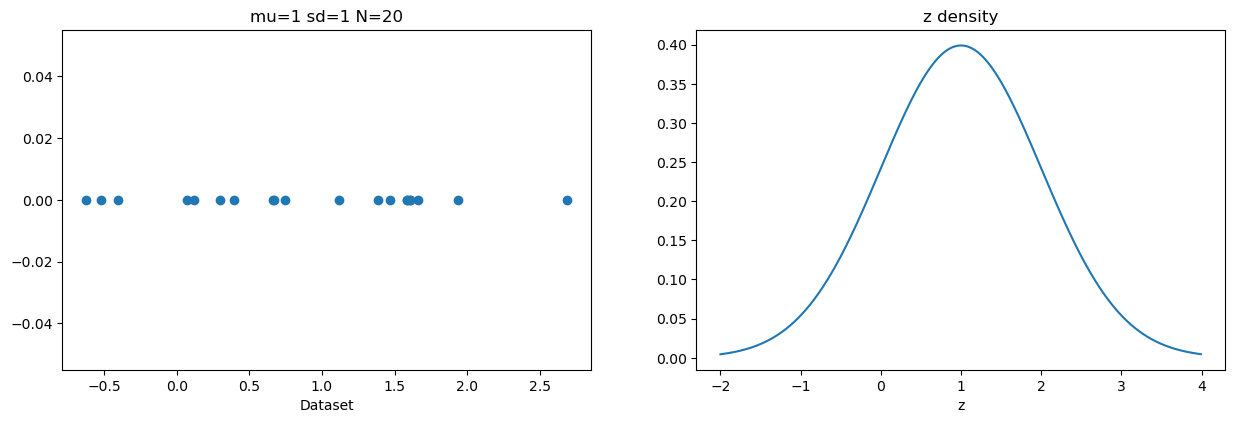

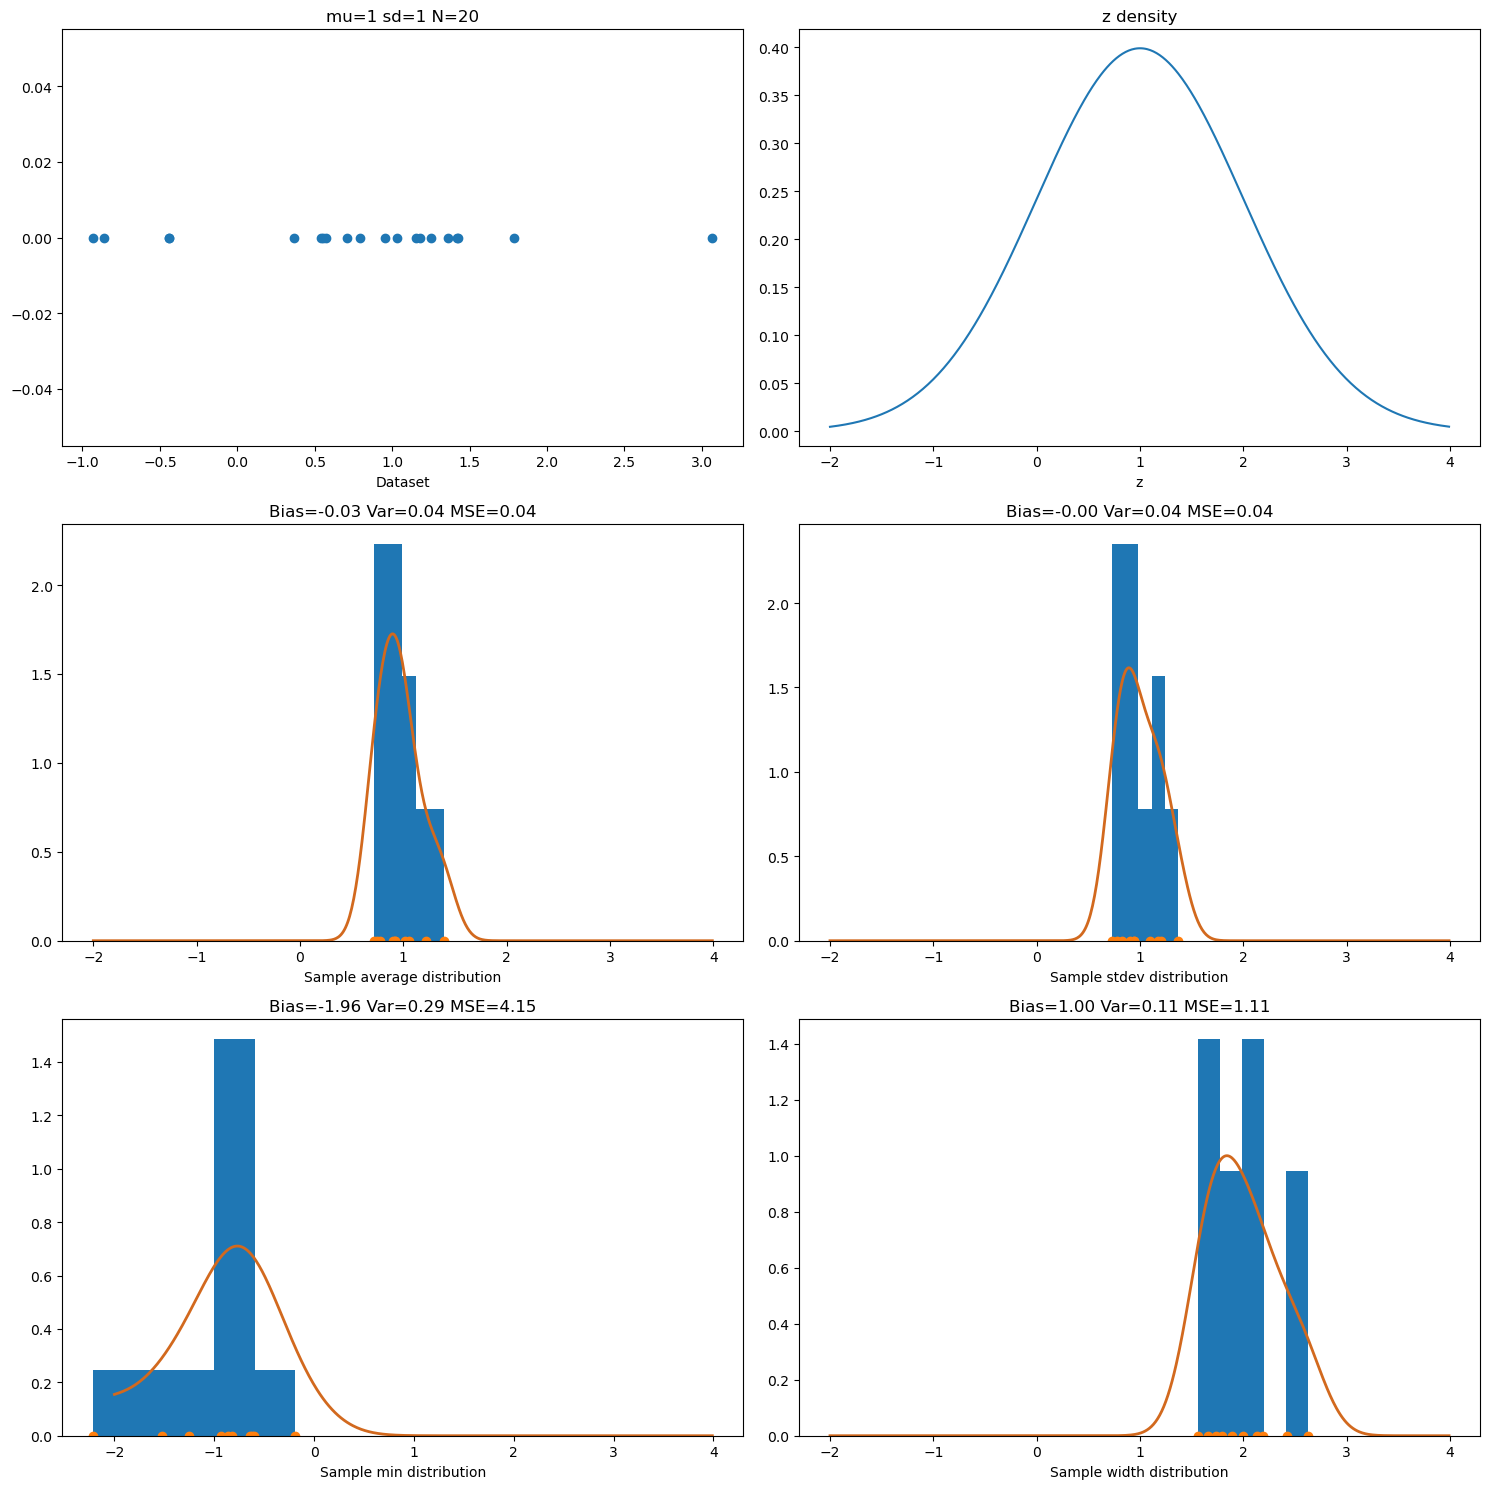

r=10 Make more runs...


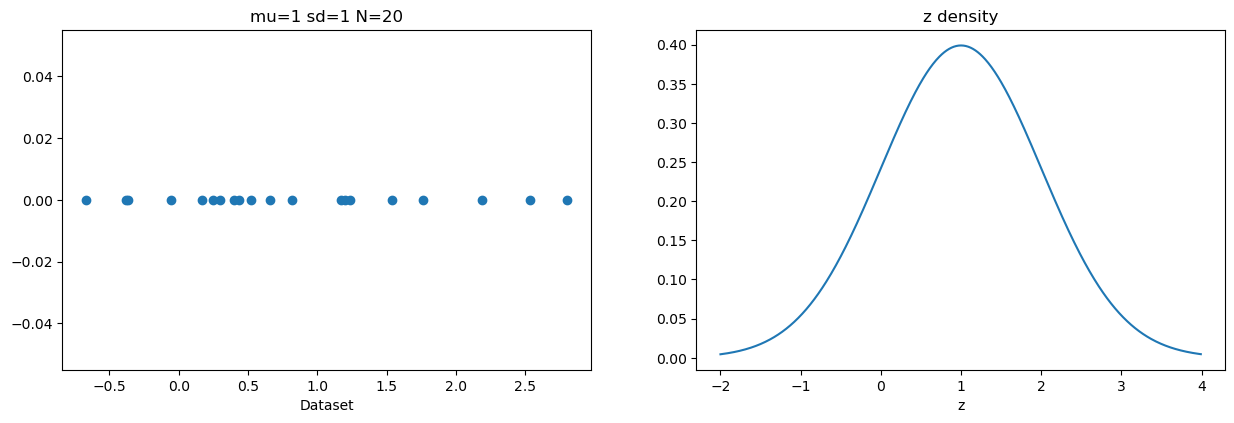

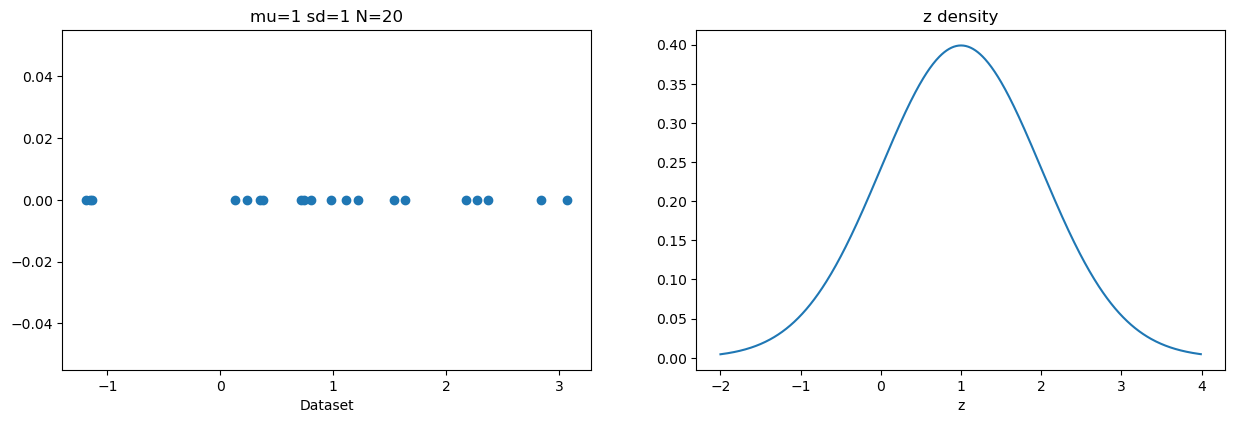

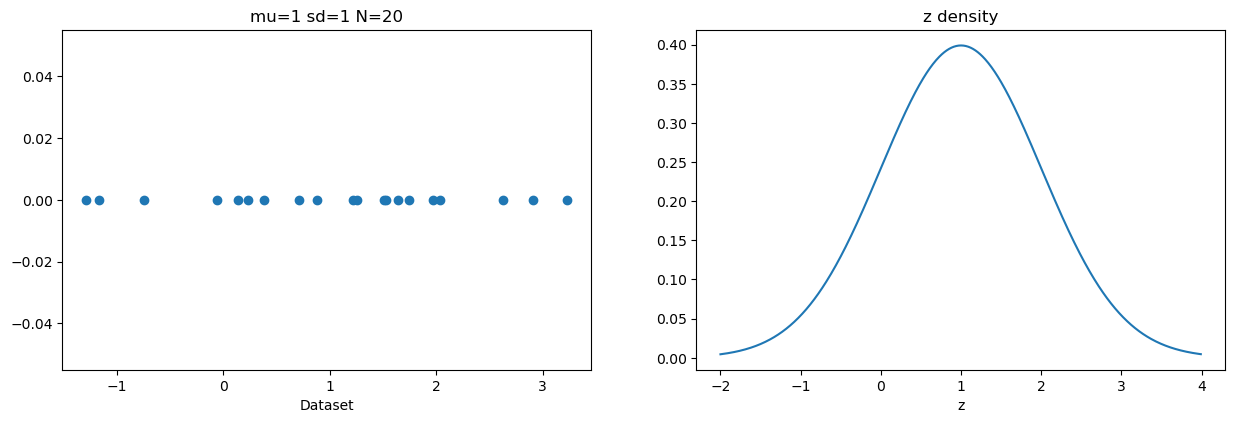

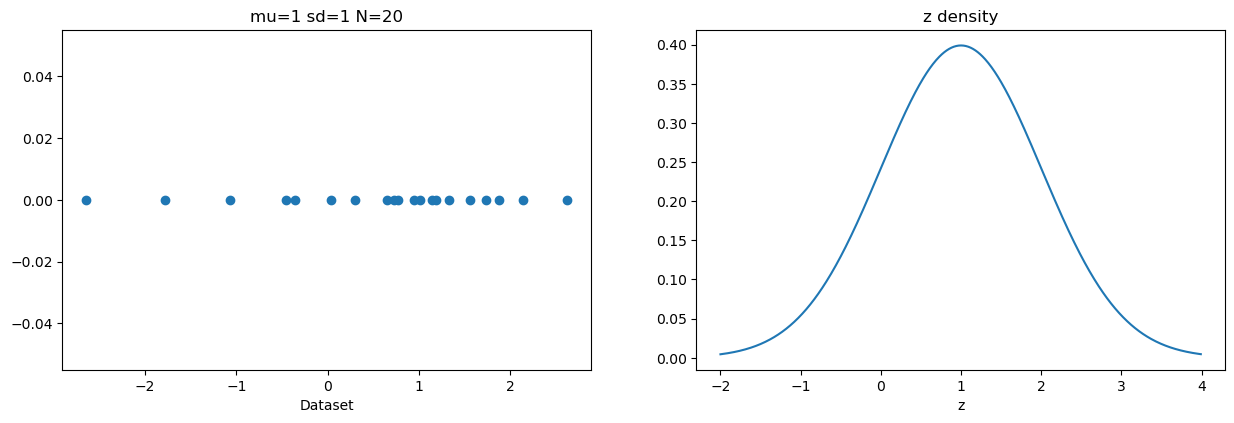

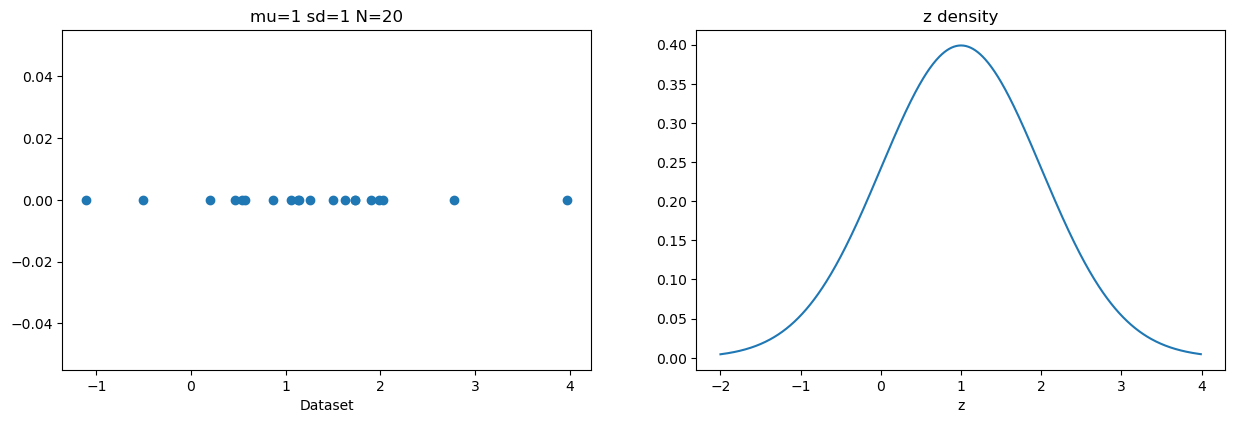

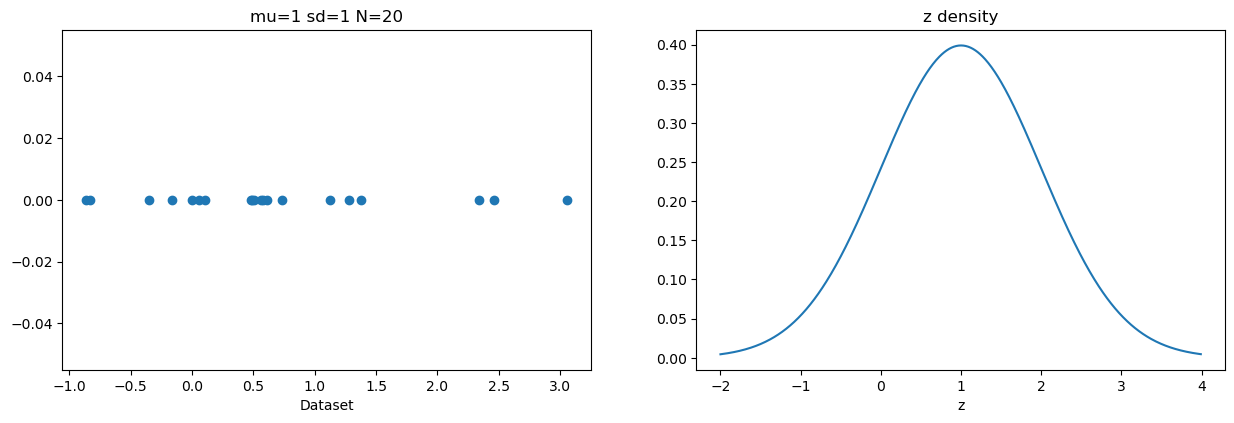

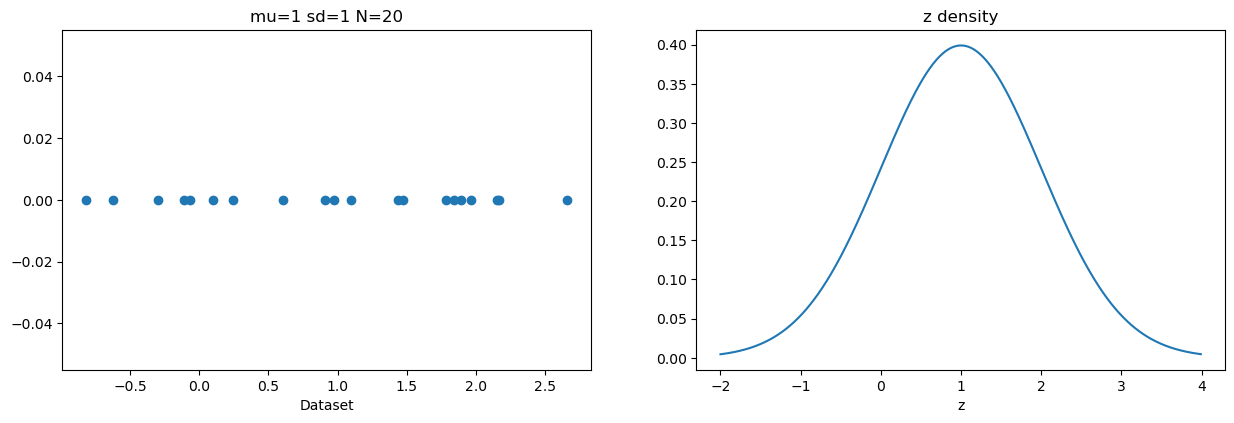

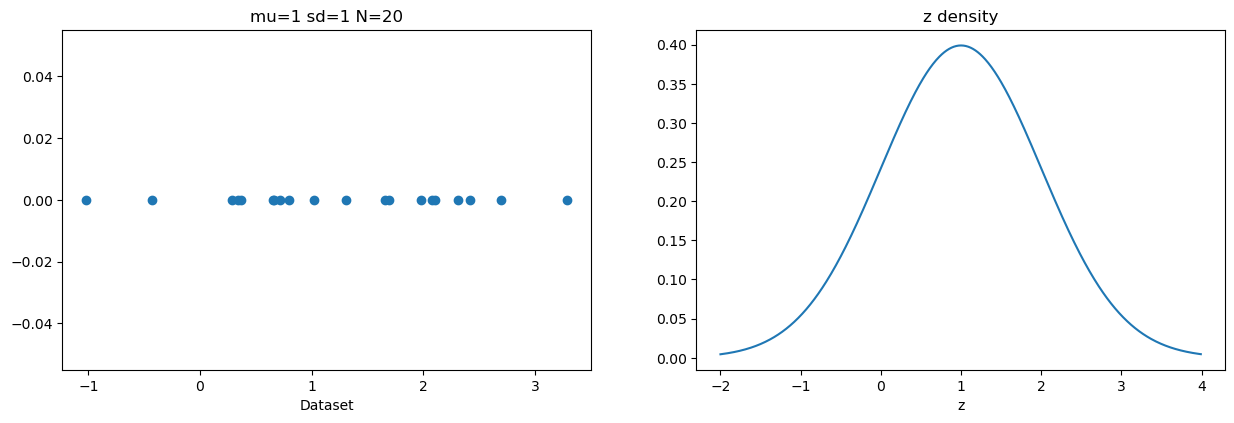

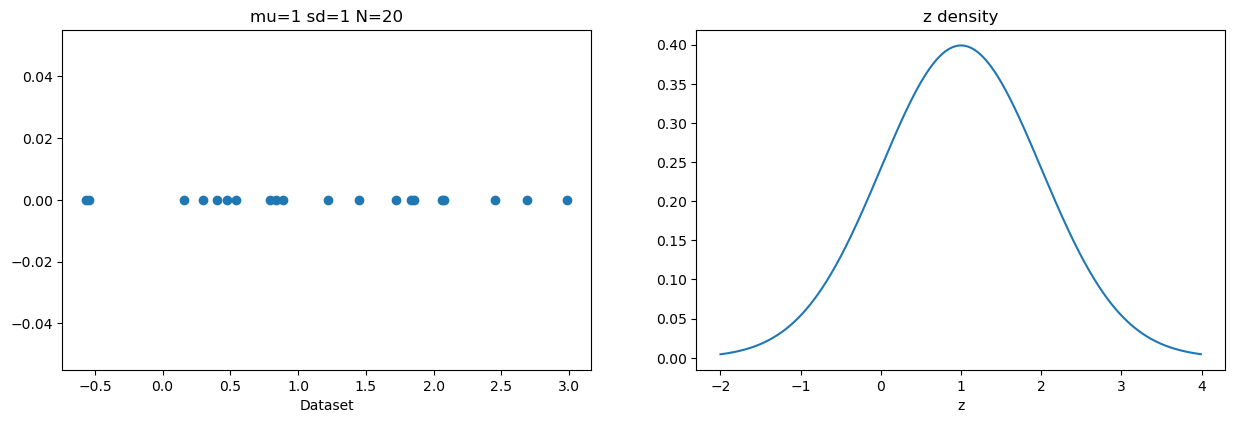

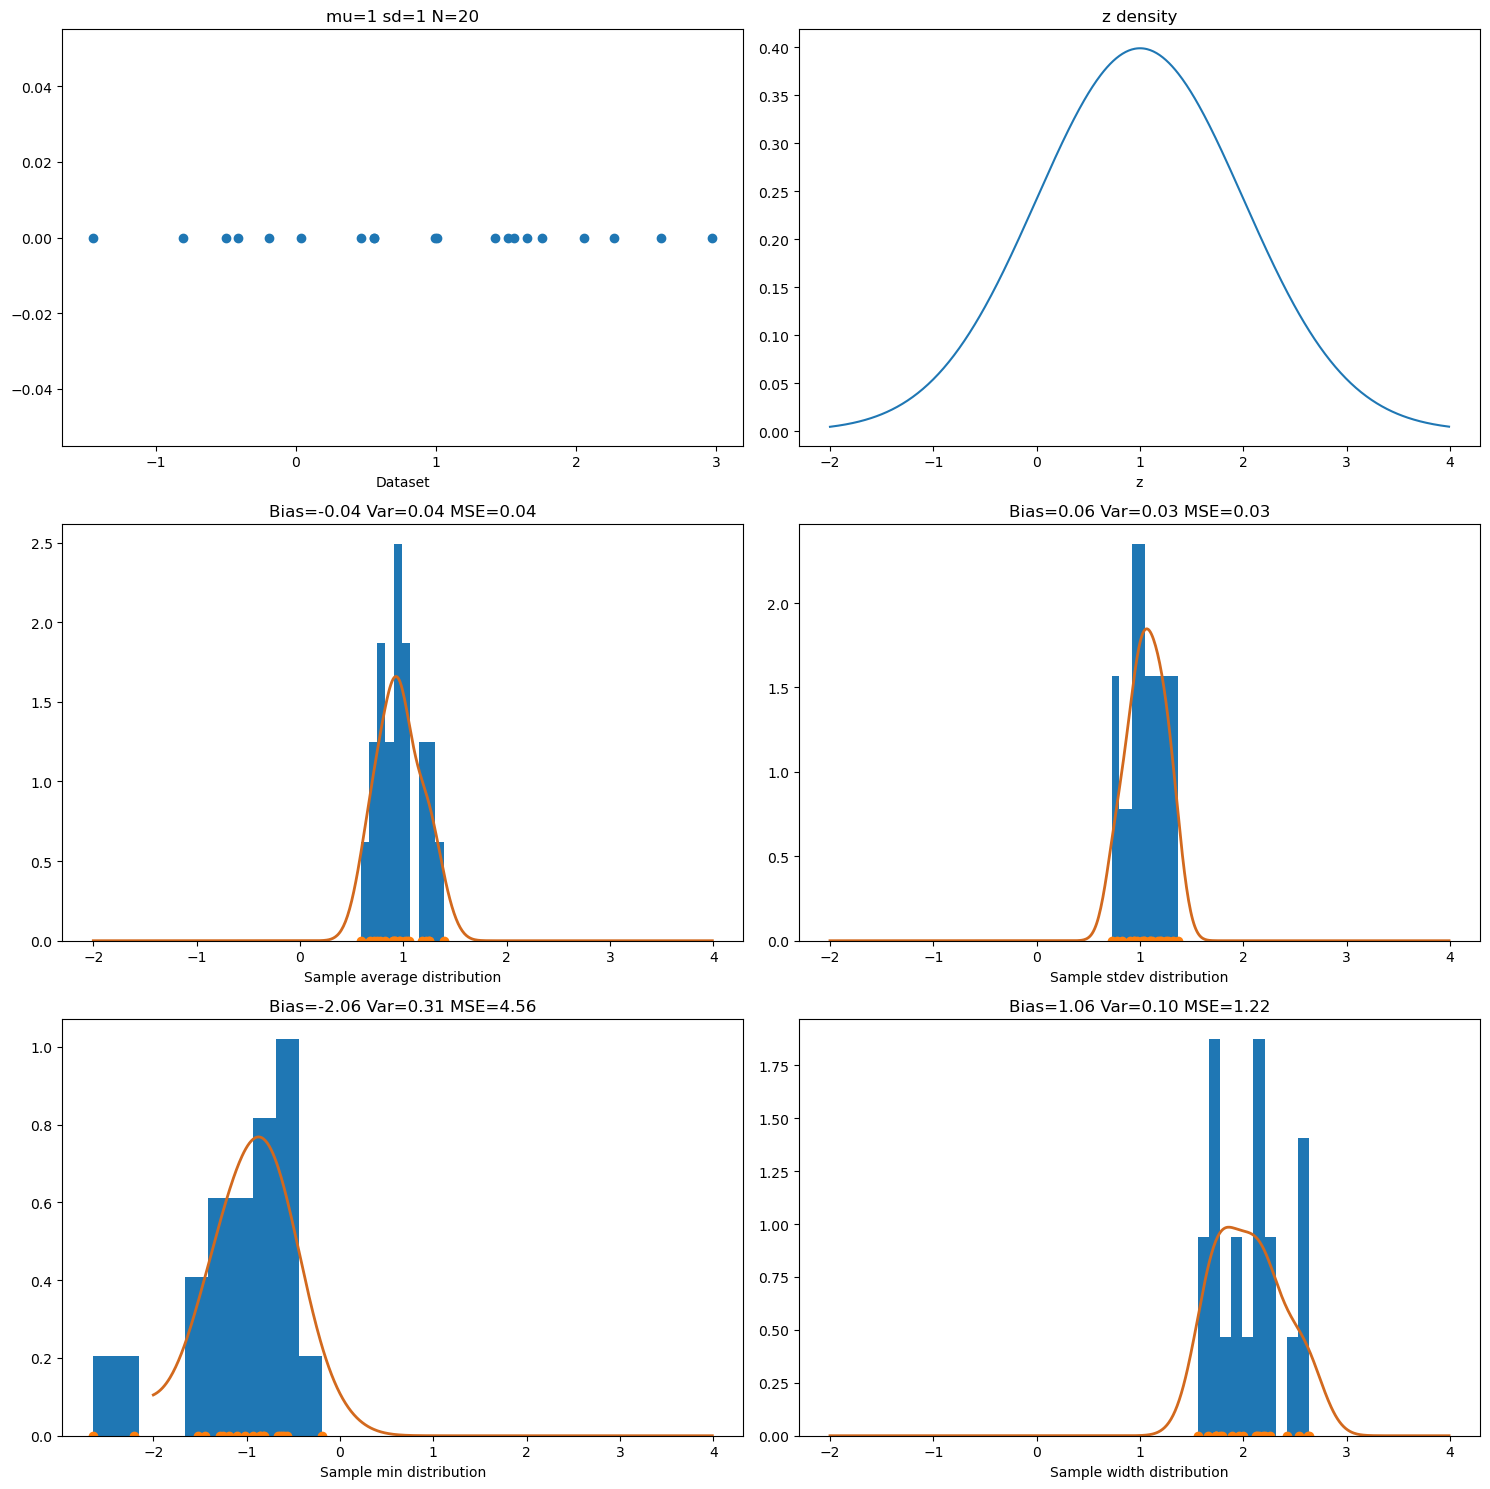

r=20 Make more runs...


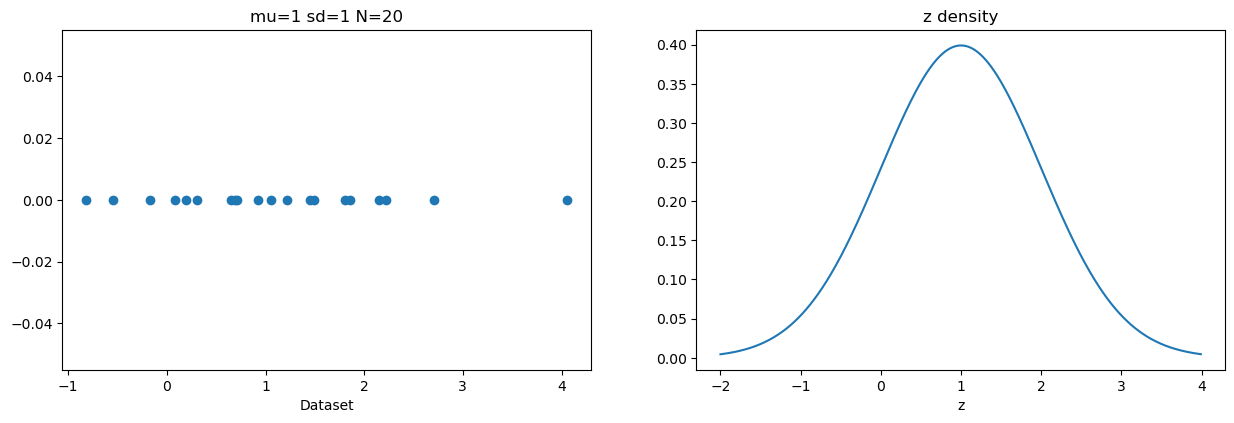

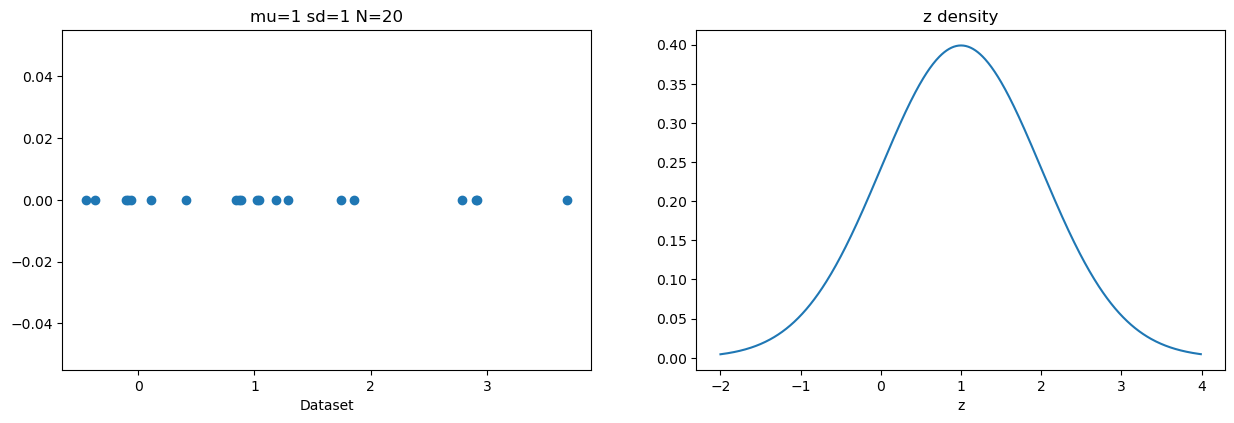

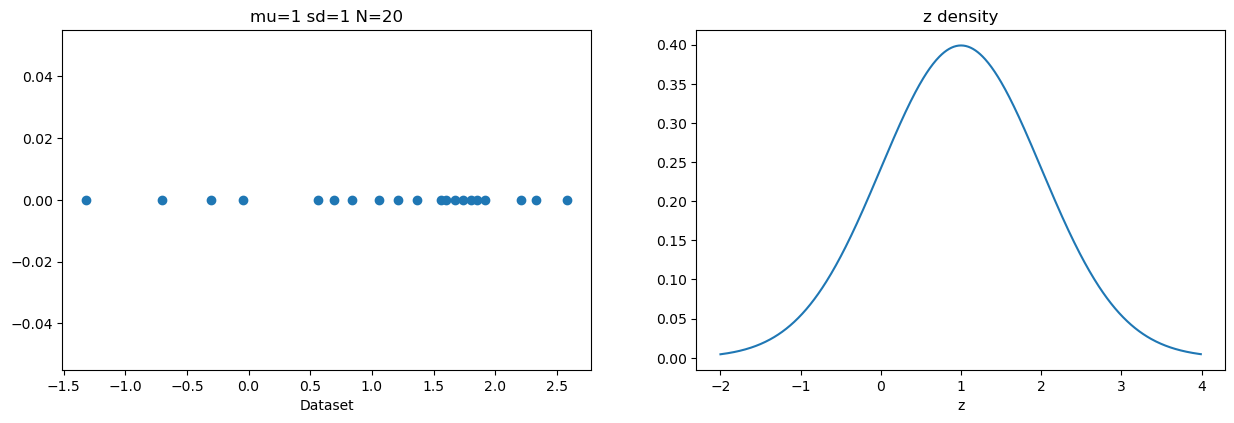

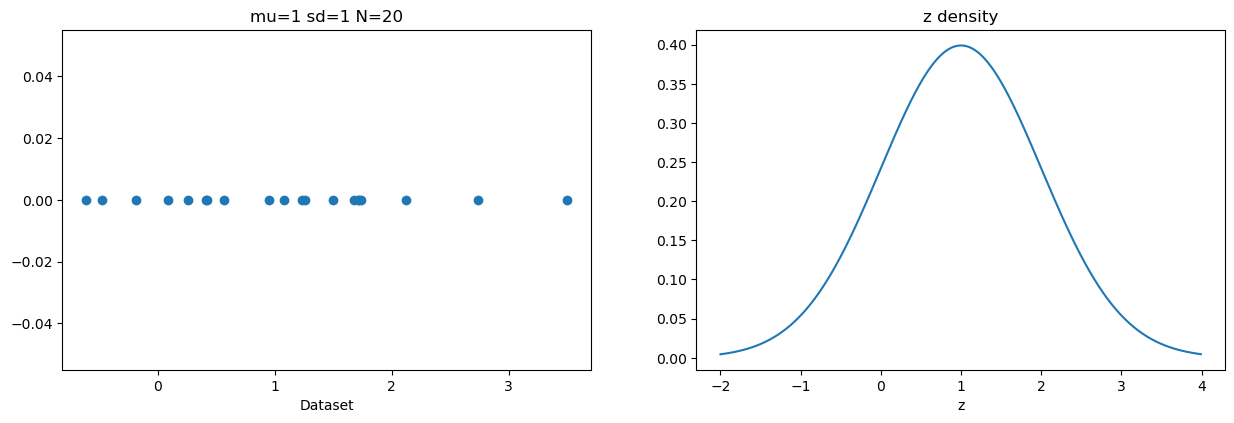

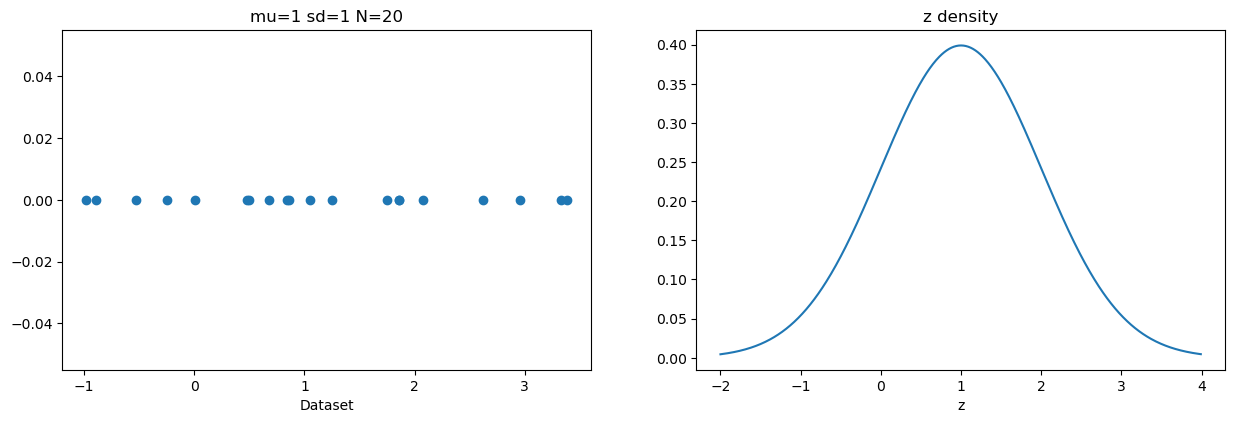

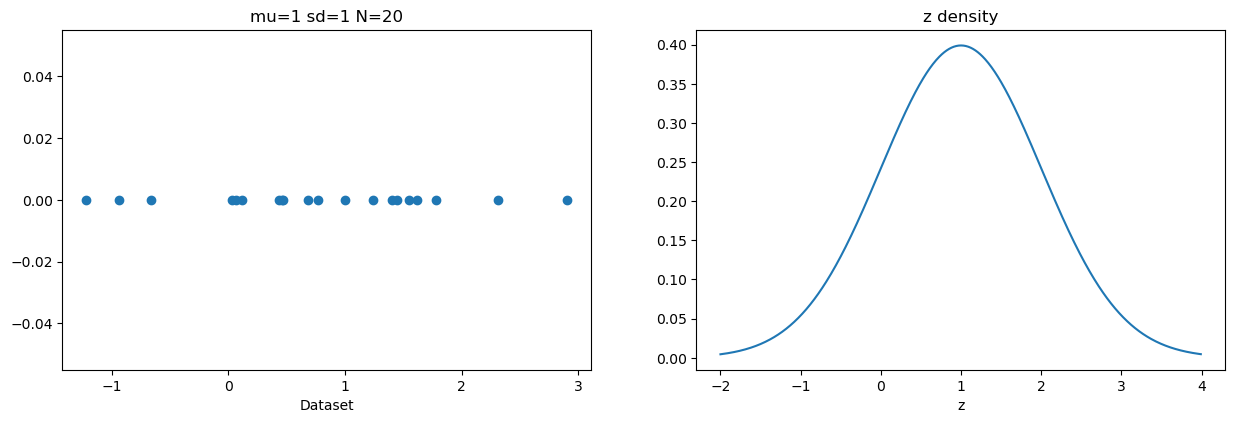

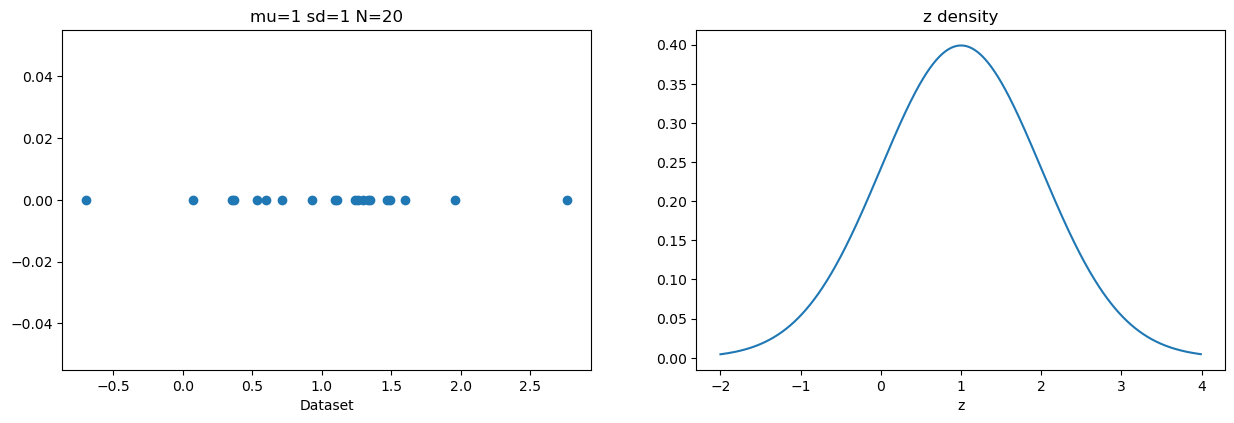

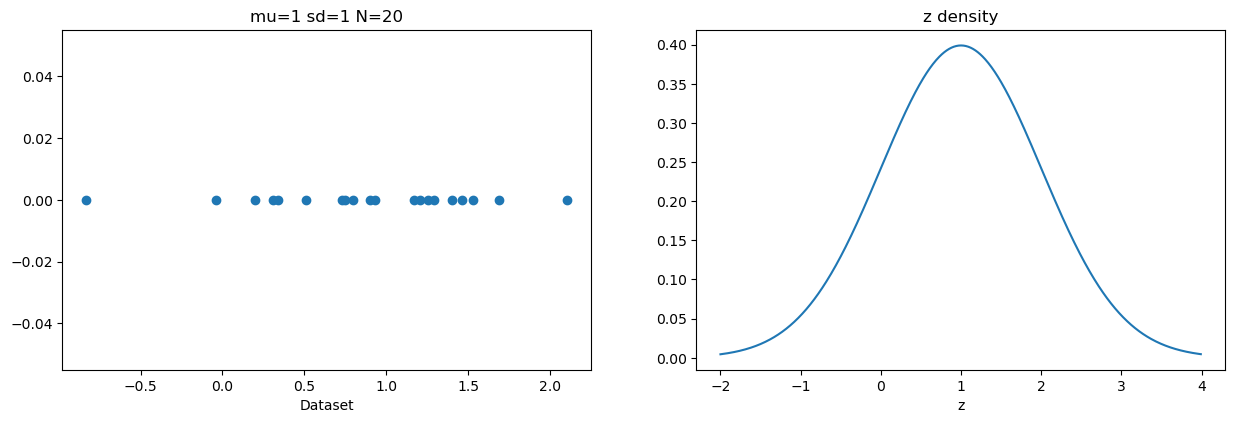

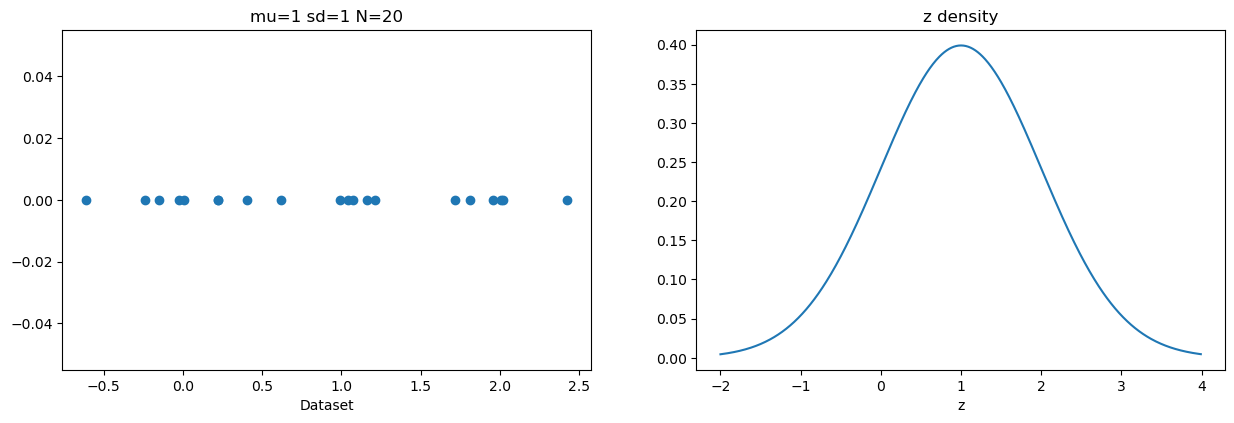

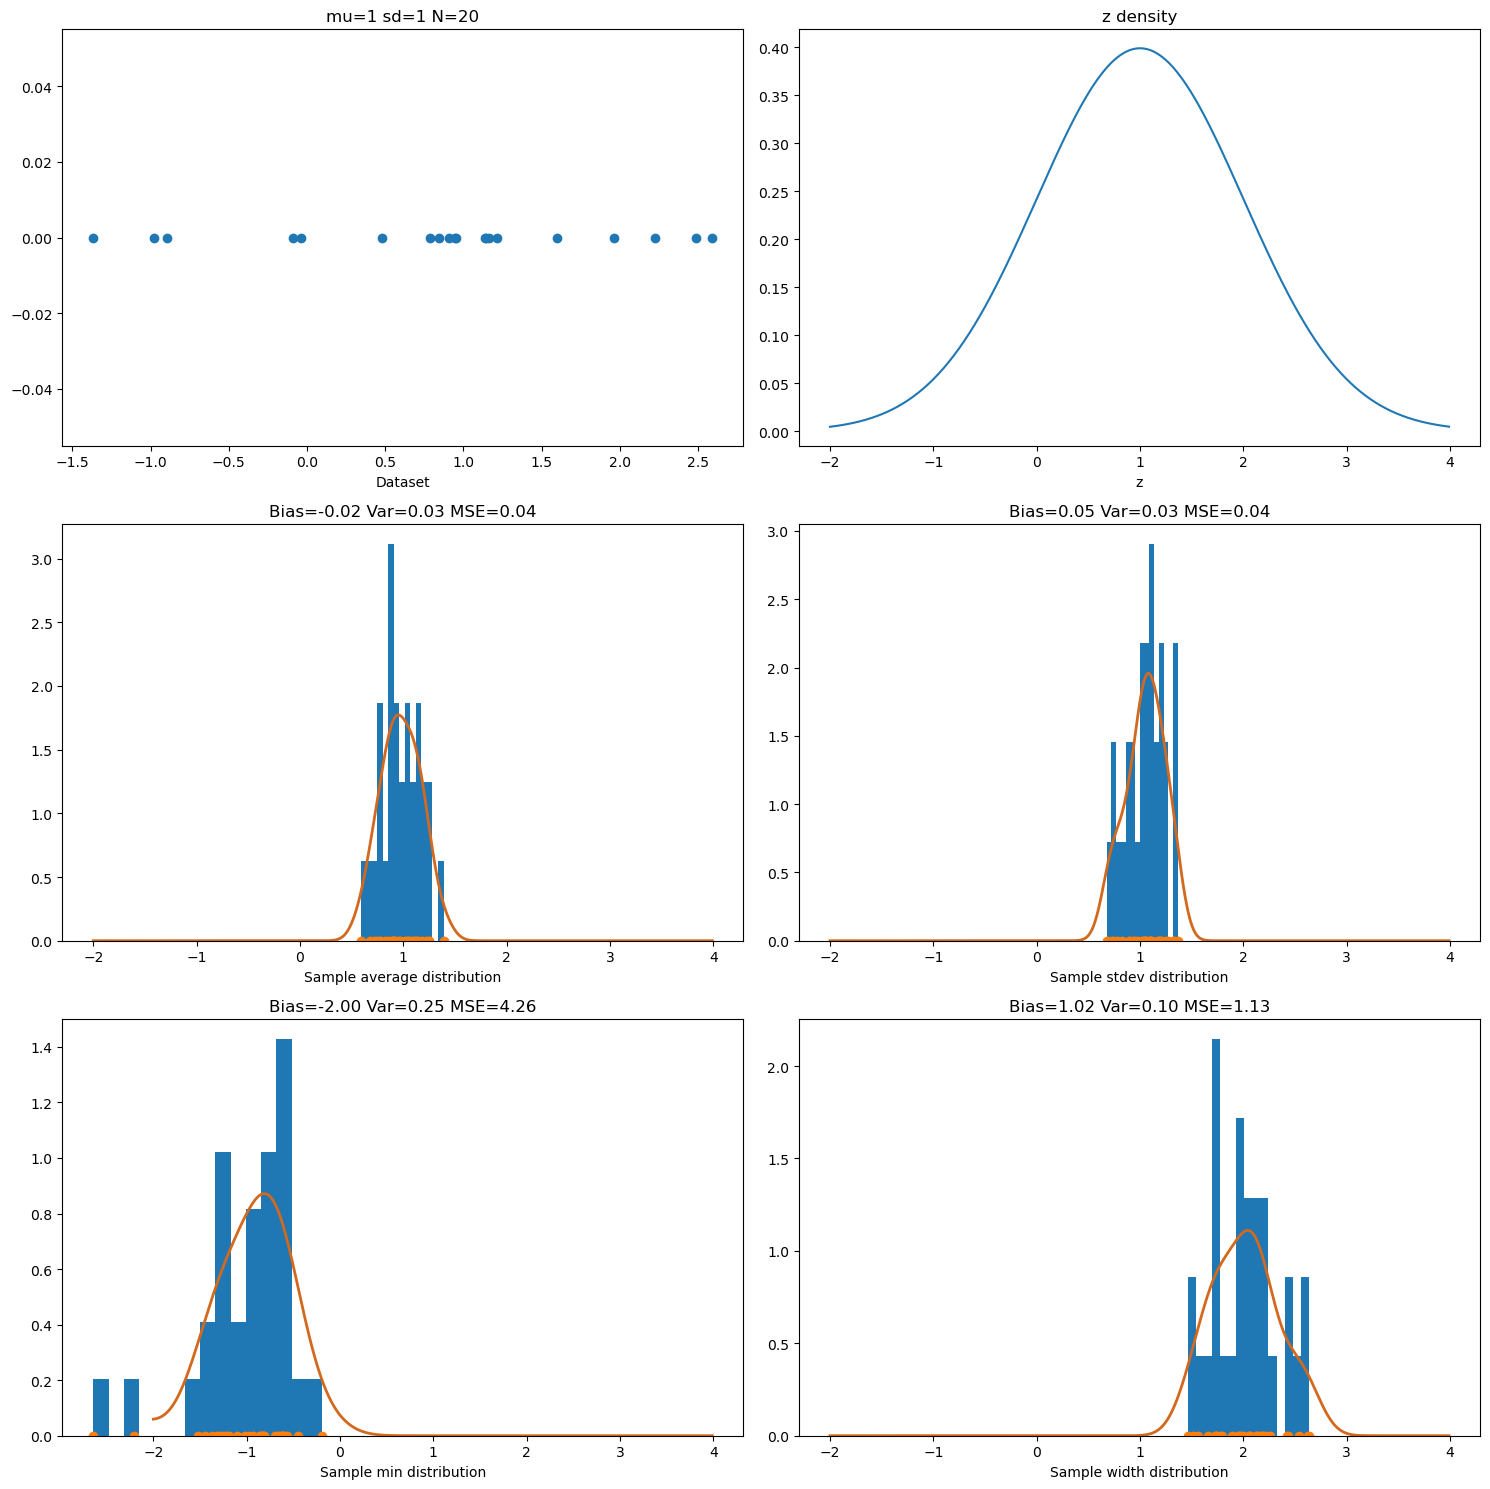

r=30 Make more runs...


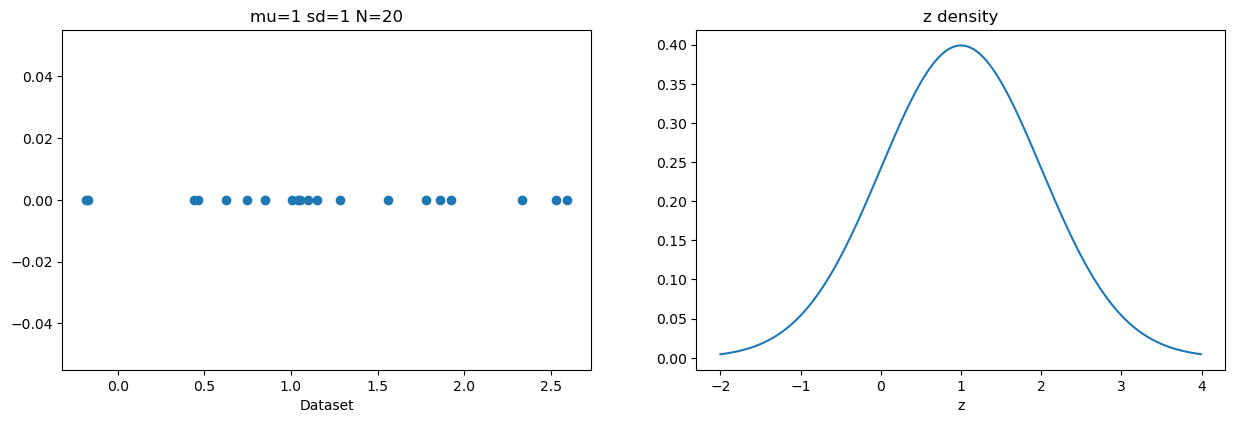

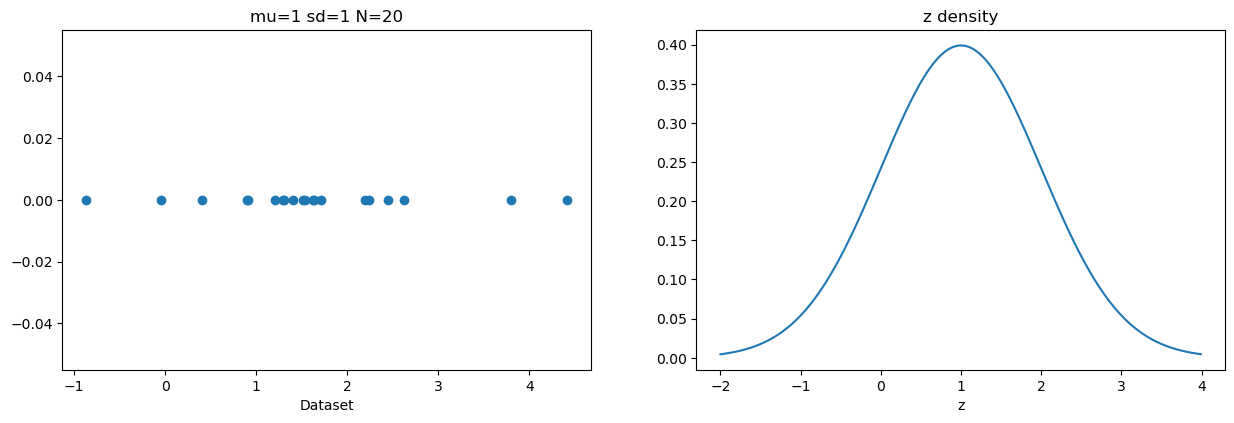

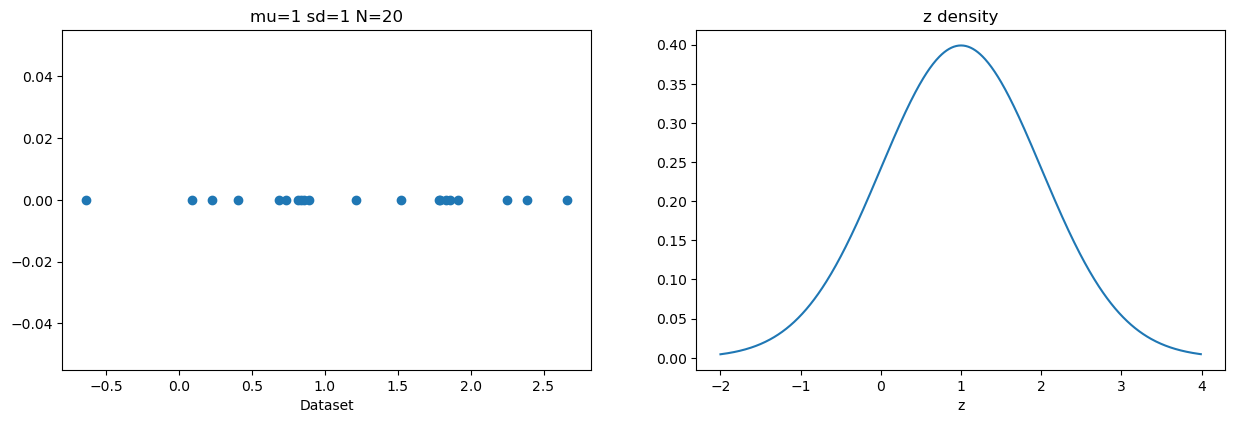

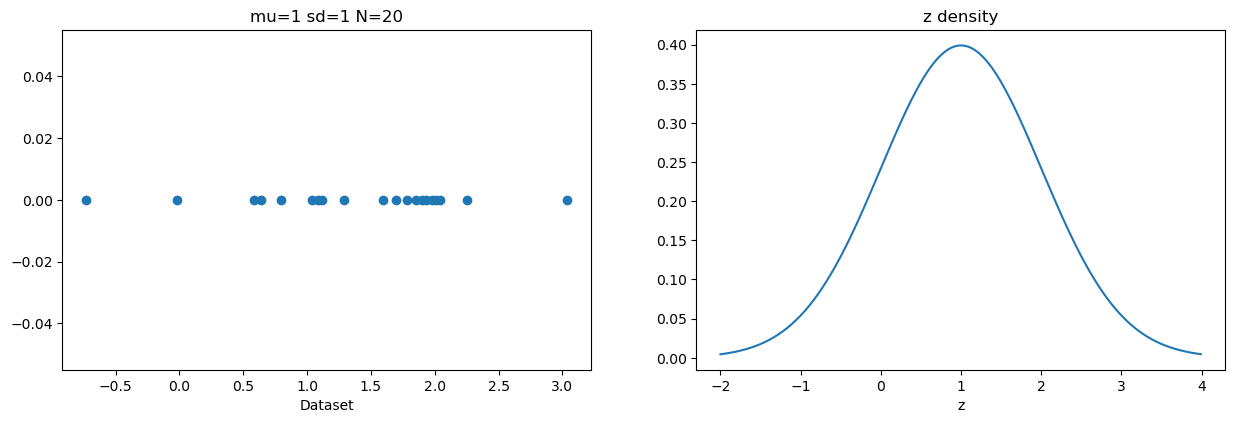

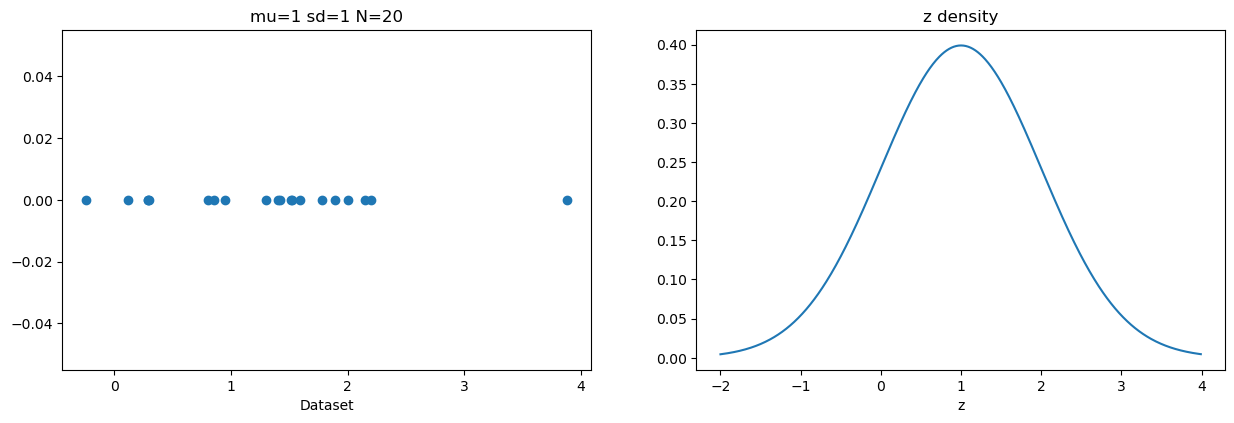

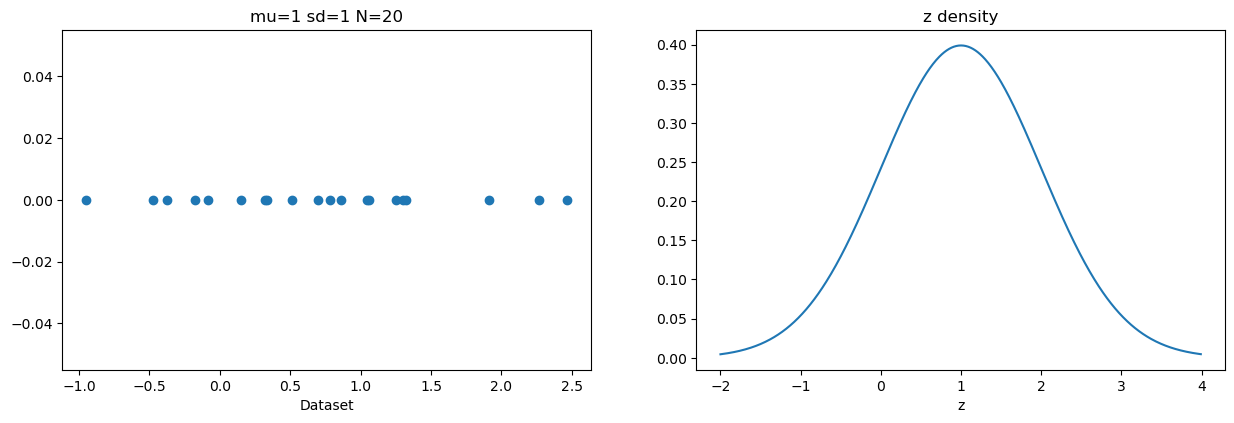

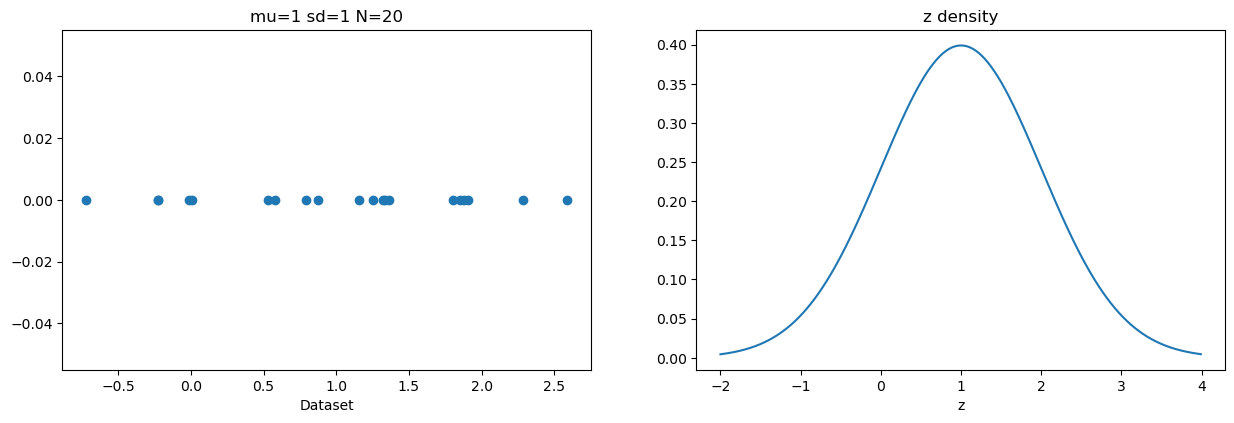

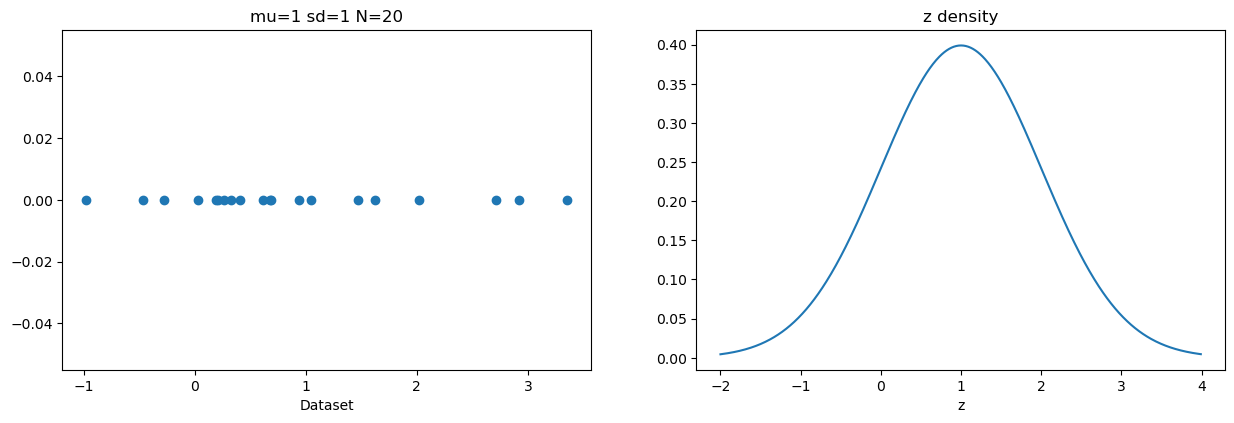

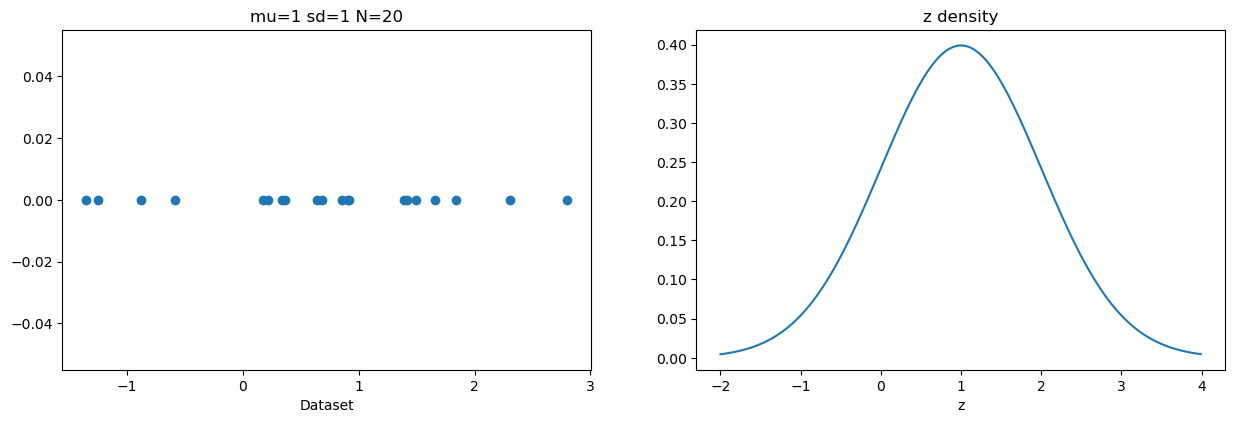

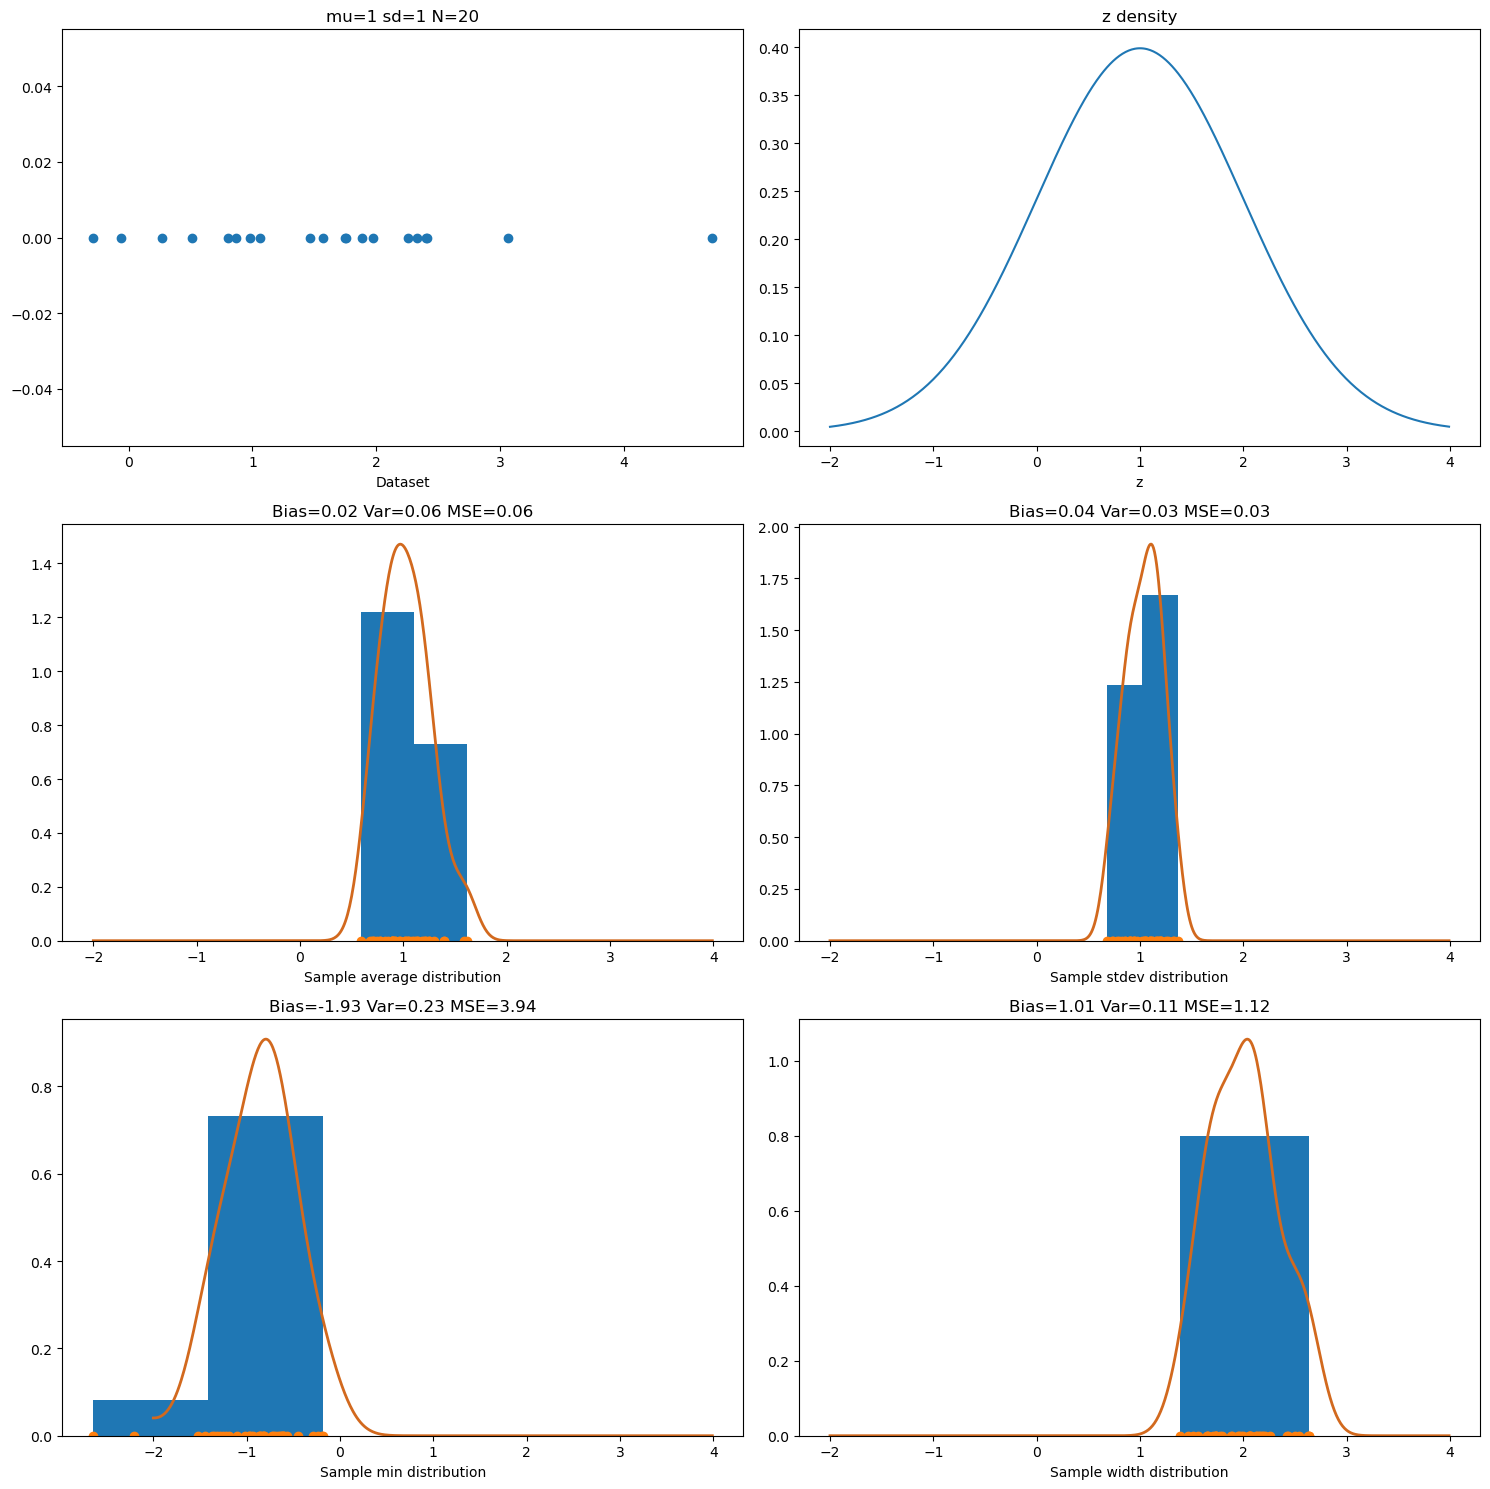

r=40 Make more runs...


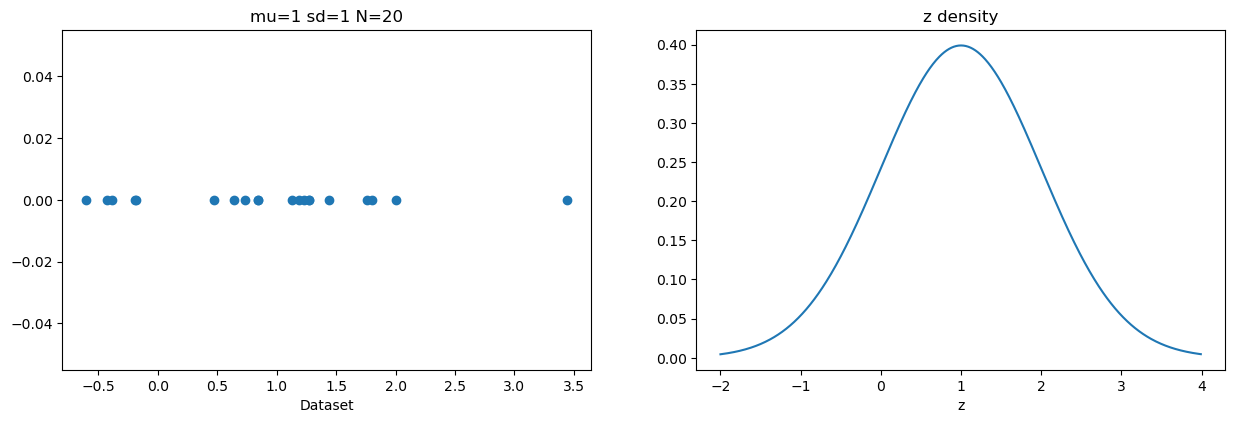

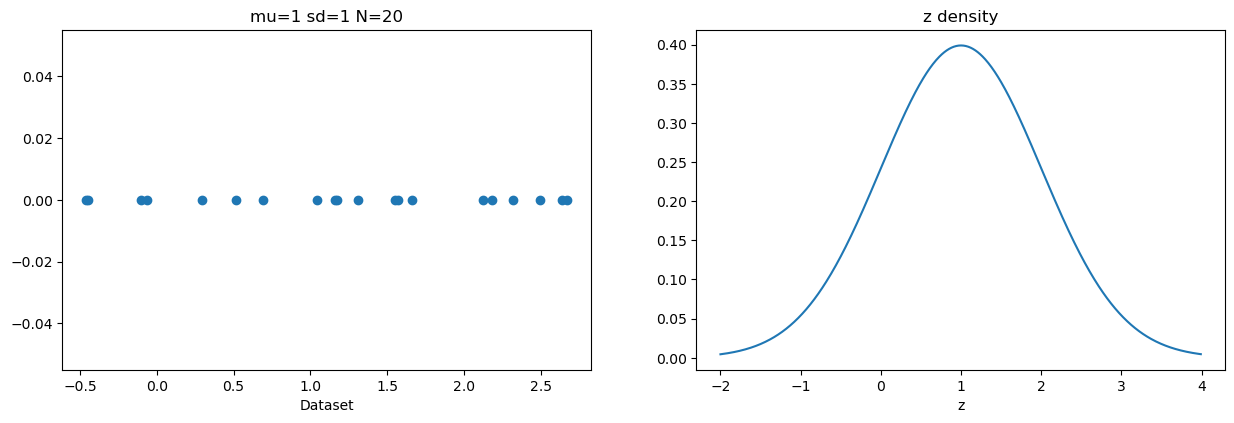

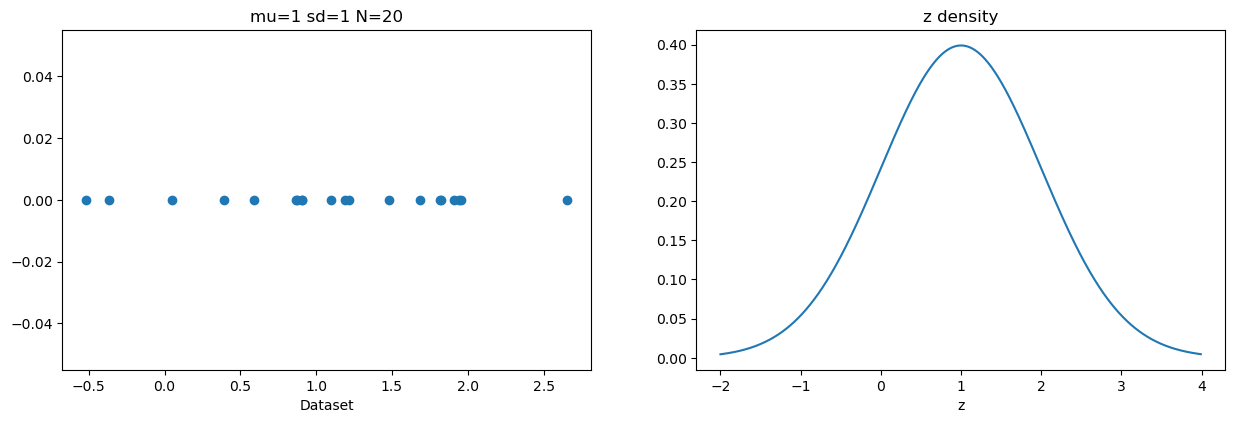

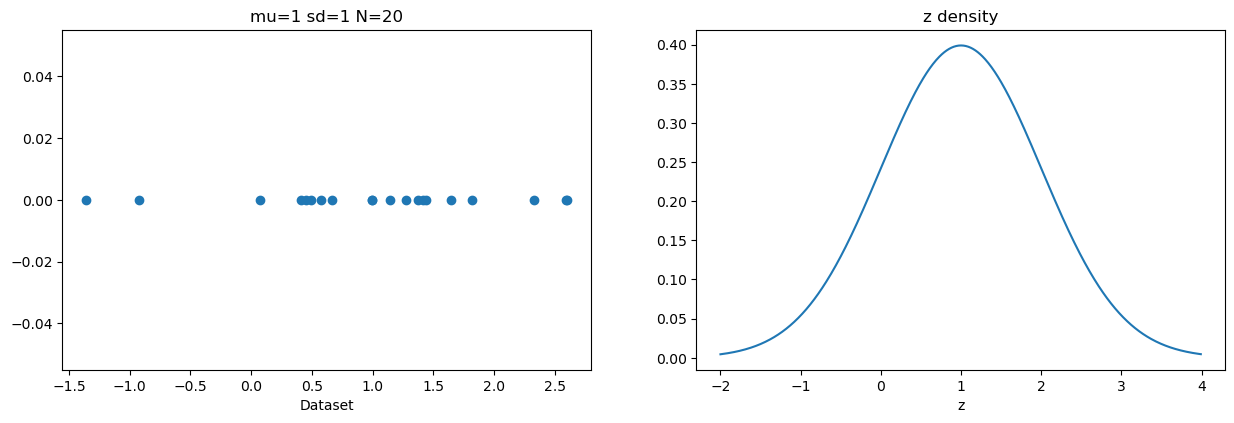

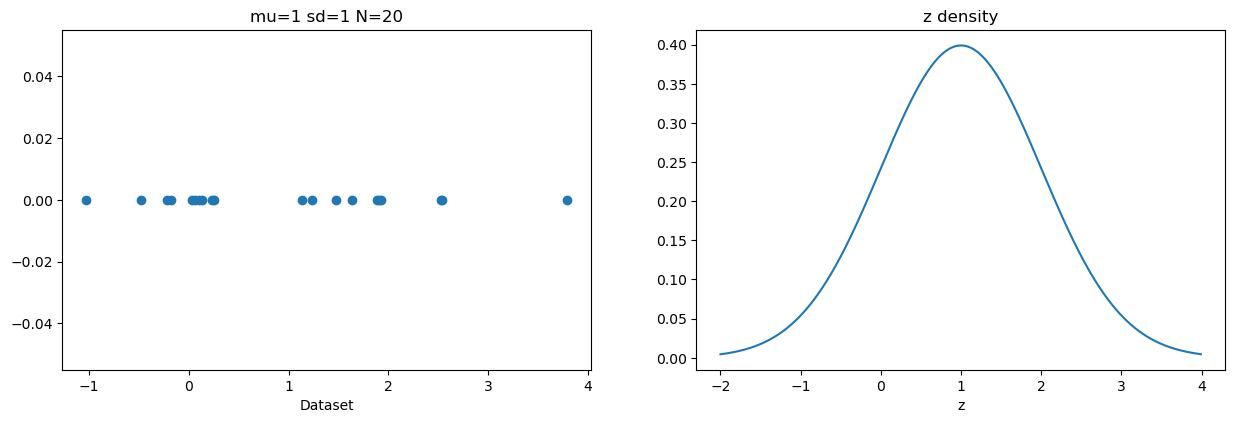

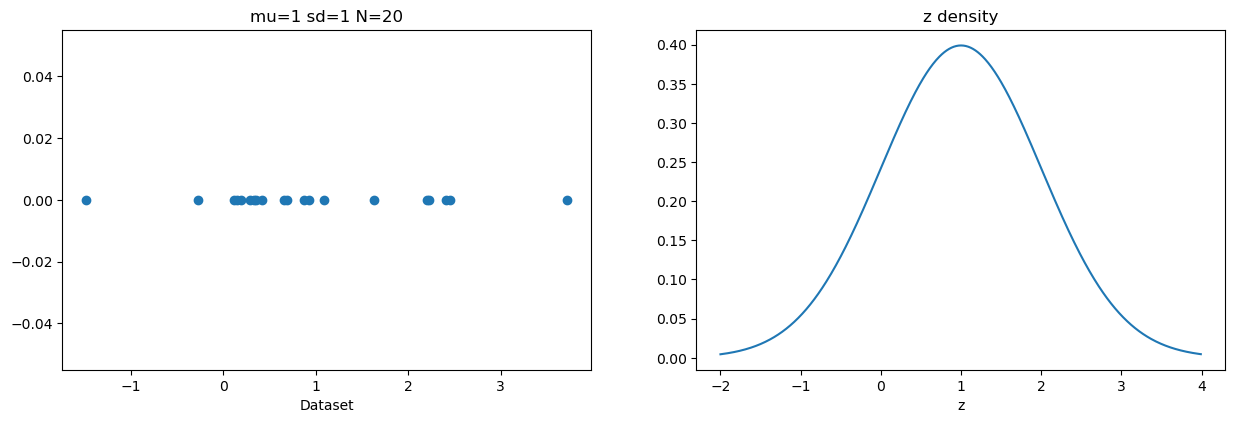

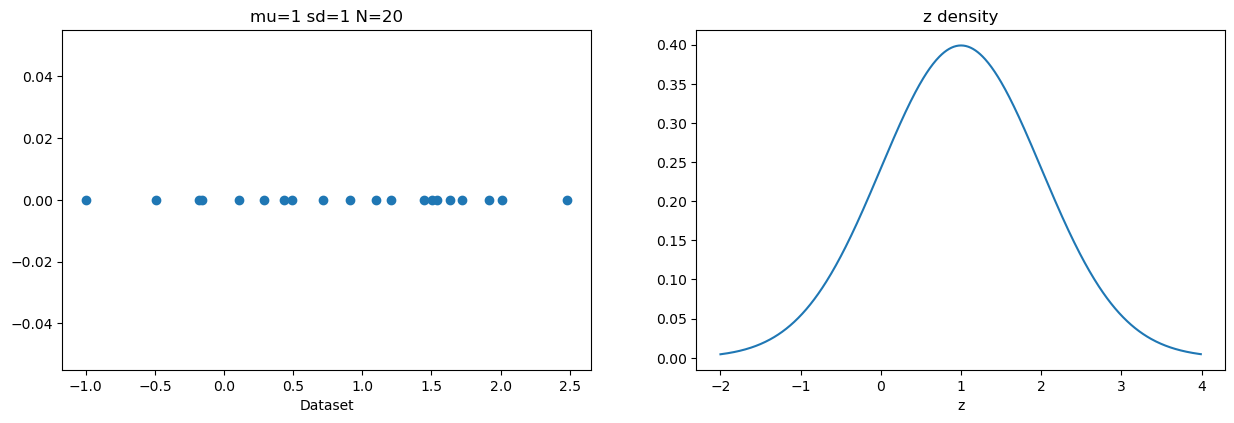

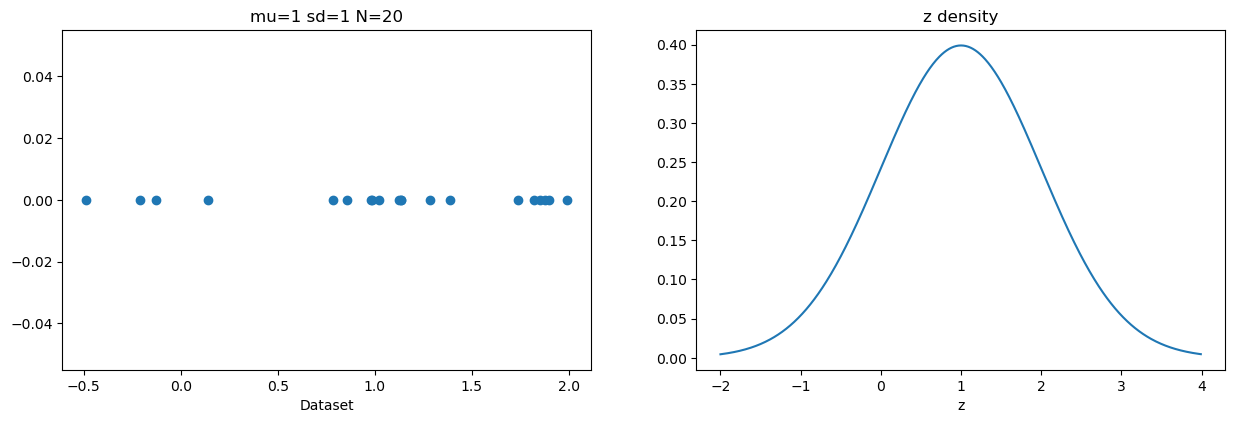

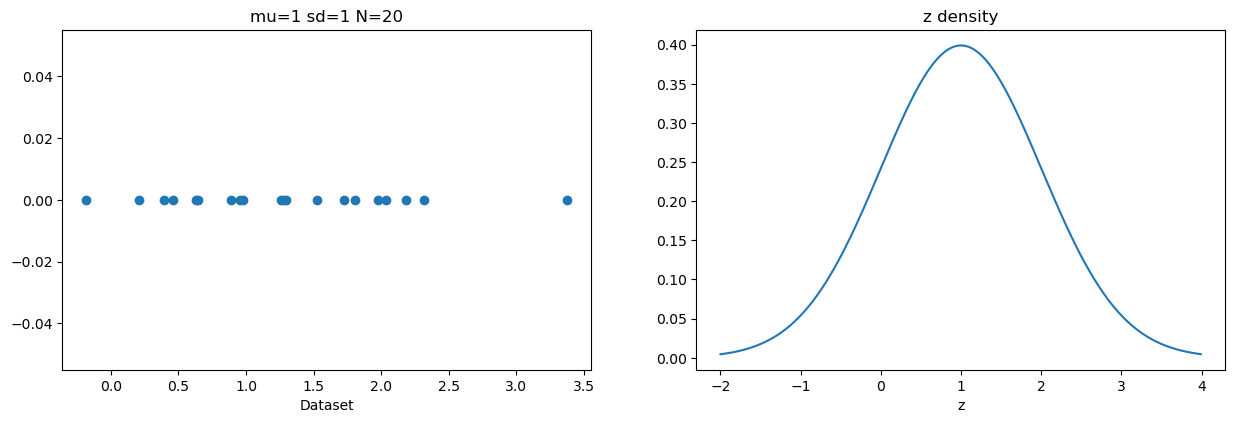

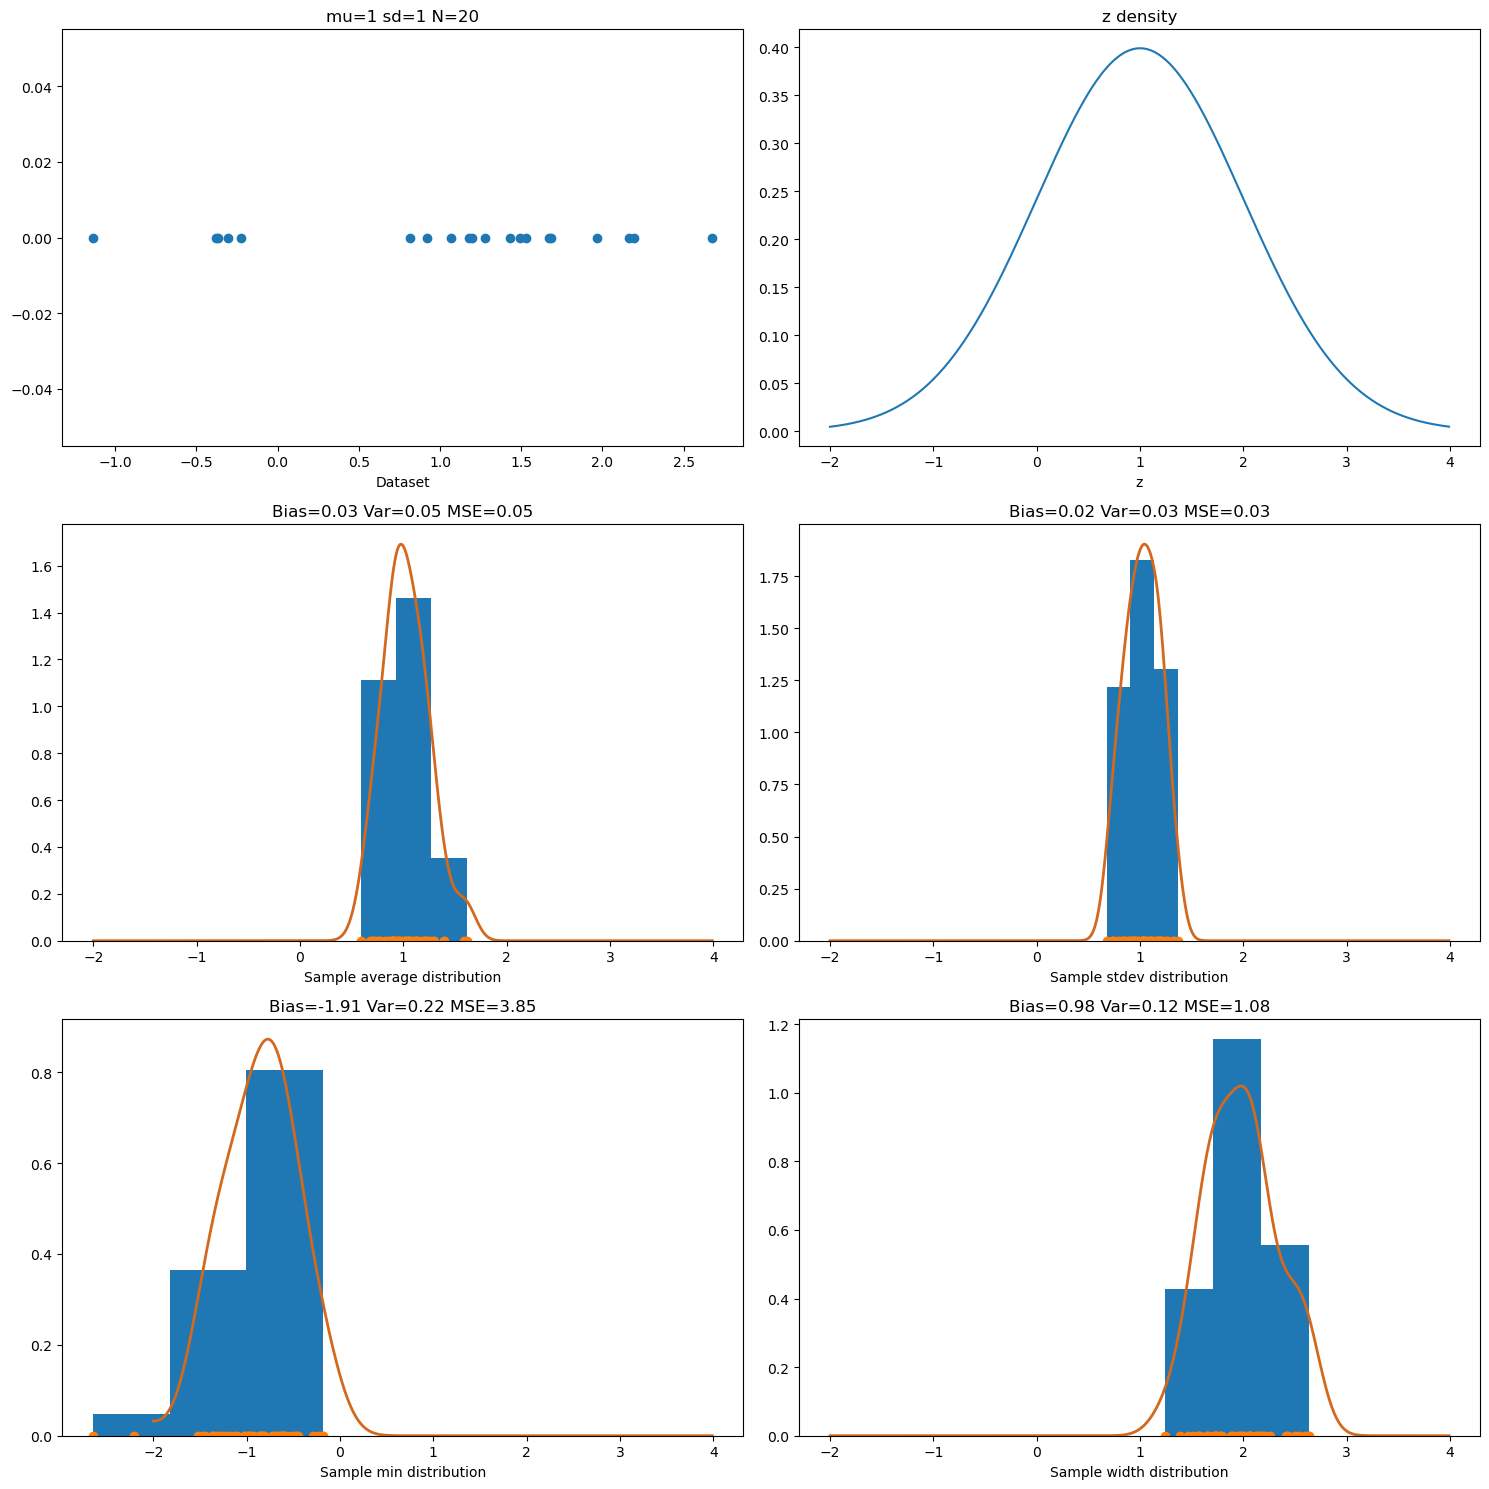

KeyboardInterrupt: Interrupted by user

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import gaussian_kde

R = 10000

muz = 1
sdz = 1
N = 20
muhat = []
sdhat = []
muhat2 = []
sdhat2 = []

for r in range(1, R+1):
    DN = np.random.normal(muz, sdz, N)
    xaxis = np.arange(muz-3*sdz, muz+3*sdz, 0.01)
    
    plt.figure(figsize=(15, 15))
    plt.subplot(3, 2, 1)
    plt.plot(DN, np.zeros_like(DN), 'o')
    plt.title(f"mu={muz} sd={sdz} N={N}")
    plt.xlabel("Dataset")
    plt.ylabel("")
    
    plt.subplot(3, 2, 2)
    plt.plot(xaxis, norm.pdf(xaxis, muz, sdz))
    plt.title("z density")
    plt.xlabel("z")
    
    muhat.append(np.mean(DN))
    sdhat.append(np.std(DN, ddof=1))
    muhat2.append(np.min(DN))
    sdhat2.append(0.5*(np.max(DN)-np.min(DN)))
    
    if r % 10 == 0:
        br = r // 15 if r > 30 else r // 2
        
        plt.subplot(3, 2, 3)
        plt.hist(muhat, bins=br, density=True)
        plt.title(f"Bias={np.mean(muhat)-muz:.2f} Var={np.var(muhat):.2f} MSE={np.mean((np.array(muhat)-muz)**2):.2f}")
        plt.xlabel("Sample average distribution")
        kde = gaussian_kde(muhat)
        plt.plot(xaxis, kde(xaxis), linewidth=2, color='chocolate')
        plt.plot(muhat, np.zeros_like(muhat), 'o')
        
        plt.subplot(3, 2, 4)
        plt.hist(sdhat, bins=br, density=True)
        plt.title(f"Bias={np.mean(sdhat)-sdz:.2f} Var={np.var(sdhat):.2f} MSE={np.mean((np.array(sdhat)-sdz)**2):.2f}")
        plt.xlabel("Sample stdev distribution")
        kde = gaussian_kde(sdhat)
        plt.plot(xaxis, kde(xaxis), linewidth=2, color='chocolate')
        plt.plot(sdhat, np.zeros_like(sdhat), 'o')
        
        plt.subplot(3, 2, 5)
        plt.hist(muhat2, bins=br, density=True)
        plt.title(f"Bias={np.mean(muhat2)-muz:.2f} Var={np.var(muhat2):.2f} MSE={np.mean((np.array(muhat2)-muz)**2):.2f}")
        plt.xlabel("Sample min distribution")
        kde = gaussian_kde(muhat2)
        plt.plot(xaxis, kde(xaxis), linewidth=2, color='chocolate')
        plt.plot(muhat2, np.zeros_like(muhat2), 'o')
        
        plt.subplot(3, 2, 6)
        plt.hist(sdhat2, bins=br, density=True)
        plt.title(f"Bias={np.mean(sdhat2)-sdz:.2f} Var={np.var(sdhat2):.2f} MSE={np.mean((np.array(sdhat2)-sdz)**2):.2f}")
        plt.xlabel("Sample width distribution")
        kde = gaussian_kde(sdhat2)
        plt.plot(xaxis, kde(xaxis), linewidth=2, color='chocolate')
        plt.plot(sdhat2, np.zeros_like(sdhat2), 'o')
        
        plt.tight_layout()
        plt.show()
        
        input(f"r={r} Make more runs...")



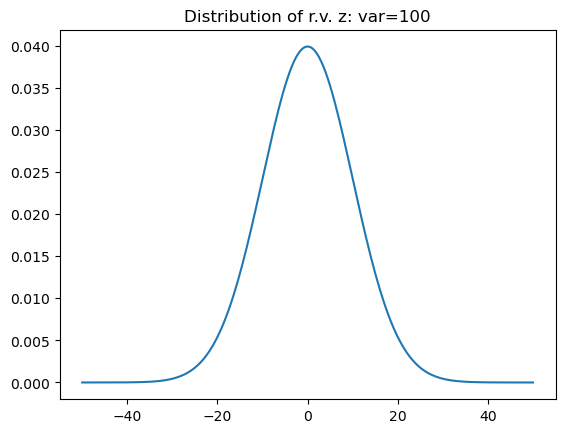

MSE=9.86
BIAS^2+VARIANCE=9.86


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N = 10
mu = 0
sdev = 10
R = 10000

I = np.arange(-50, 50.5, 0.5)
p = norm.pdf(I, loc=mu, scale=sdev)
plt.plot(I, p)
plt.title(f"Distribution of r.v. z: var={sdev**2}")
plt.show()

mu_hat = np.zeros((R, 1))
for r in range(R):
    D = np.random.normal(loc=mu, scale=sdev, size=N)
    mu_hat[r, 0] = np.mean(D)

err = mu_hat - mu

MSE = np.mean(err**2)
BIAS = np.mean(mu_hat) - mu
VARIANCE = np.var(mu_hat)

print(f"MSE={MSE:.2f}")
print(f"BIAS^2+VARIANCE={BIAS**2 + VARIANCE:.2f}")


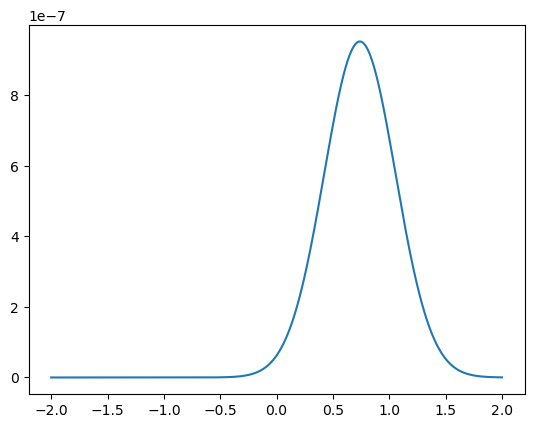

Sample average = 0.738023, arg max L = 0.738000


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(0)
N = 10
DN = np.random.normal(0, 1, N)

Theta = np.arange(-2, 2, 0.001)
L = np.ones(len(Theta))

for ith in range(len(Theta)):
    for i in range(N):
        L[ith] *= norm.pdf(DN[i], Theta[ith], 1)

plt.plot(Theta, L)
plt.show()

print(f"Sample average = {np.mean(DN):.6f}, arg max L = {Theta[np.argmax(L)]:.6f}")



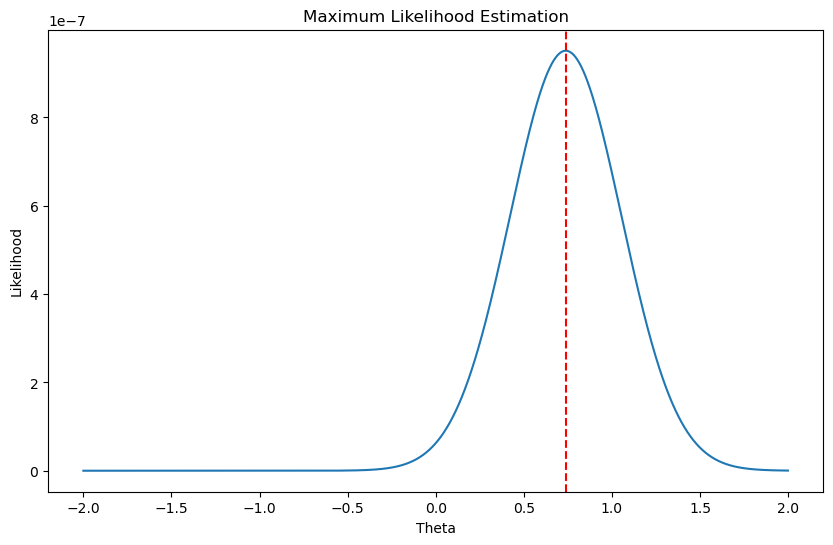

Sample average = 0.738023, arg max L = 0.738000


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Clear all variables
# (Not necessary in Python, as variables are scoped)

# Set up the plot
plt.figure(figsize=(10, 6))

# Set random seed
np.random.seed(0)

N = 10
DN = np.random.normal(0, 1, N)

Theta = np.arange(-2, 2, 0.001)
L = np.ones(len(Theta))

for ith in range(len(Theta)):
    for i in range(N):
        L[ith] *= norm.pdf(DN[i], Theta[ith], 1)

plt.plot(Theta, L)
plt.axvline(x=Theta[np.argmax(L)], color='r', linestyle='--')

plt.xlabel('Theta')
plt.ylabel('Likelihood')
plt.title('Maximum Likelihood Estimation')

plt.show()

print(f"Sample average = {np.mean(DN):.6f}, arg max L = {Theta[np.argmax(L)]:.6f}")



In [27]:
import numpy as np
from scipy.optimize import minimize_scalar, minimize
from scipy.stats import norm

# Script: shows the use of maximum likelihood for parameter estimation

np.random.seed(0)

def eml(m, D, var):   # empirical likelihood function (1 argument)
    N = len(D)
    Lik = 1
    for i in range(N):
        Lik *= norm.pdf(D[i], m, np.sqrt(var))
    return -np.log(Lik)

def eml2(m, D):   # empirical likelihood function (2 arguments)
    N = len(D)
    Lik = 1
    for i in range(N):
        Lik *= norm.pdf(D[i], m[0], np.sqrt(max(0, m[1])))
    return -np.log(Lik)

N = 20

DN = np.random.normal(size=N)  # data generation

xmin = minimize_scalar(eml, args=(DN, 1), bounds=(-1, 1), method='bounded')
# maximization of log likelihood function (1 argument)
print(f"Mean ML estimation (univariate optimisation= {xmin.x}")

xmin2 = minimize(eml2, [0,1], args=(DN,))
# maximization of log likelihood function (2 arguments: mean and variance)

print(f"Mean and variance ML estimation (bivariate optimisation)= {xmin2.x}")

print(f"Sample average estimation : {np.mean(DN)}")  # sample average
print(f"Sample variance estimation: {np.var(DN)}")  # sample variance with N-1 at the denominator



Mean ML estimation (univariate optimisation= 0.5693345929456354
Mean and variance ML estimation (bivariate optimisation)= [0.56933474 0.72281054]
Sample average estimation : 0.5693345929456347
Sample variance estimation: 0.7228107940950779


In [25]:
np.var(DN)

0.7228107940950779

In [28]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
import math

N = 100
n = 3

np.random.seed(555)
X = np.random.normal(size=(N, n))

Y = X[:, 0]**2 + 5*X[:, 2] + 4*np.log(np.abs(X[:, 1]))

N_tr = N // 2

X_tr = X[:N_tr]
Y_tr = Y[:N_tr]

K = 10
N_k = N // K
cv = np.zeros(K)

kf = KFold(n_splits=K, shuffle=False)

for k, (train_index, test_index) in enumerate(kf.split(X_tr)):
    X_k_tr, X_k_ts = X_tr[train_index], X_tr[test_index]
    Y_k_tr, Y_k_ts = Y_tr[train_index], Y_tr[test_index]
    
    np.random.seed(555)
    model_nn = MLPRegressor(hidden_layer_sizes=(25,), max_iter=10000, activation='identity')
    model_nn.fit(X_k_tr, Y_k_tr)
    
    Y_k_hat_ts = model_nn.predict(X_k_ts)
    test_k_MSE = np.mean((Y_k_ts - Y_k_hat_ts)**2)
    cv[k] = test_k_MSE

I_ts = slice(N_tr, N)
X_ts = X[I_ts]
Y_ts = Y[I_ts]

np.random.seed(555)
model_nn = MLPRegressor(hidden_layer_sizes=(25,), max_iter=10000, activation='identity', verbose=True)
model_nn.fit(X_tr, Y_tr)

Y_hat_tr = model_nn.predict(X_tr)
empirical_MSE = np.mean((Y_tr - Y_hat_tr)**2)
print(f"Empirical MSE= {empirical_MSE:.2f}")

Y_hat_ts = model_nn.predict(X_ts)
test_MSE = np.mean((Y_ts - Y_hat_ts)**2)

print(f"Test MSE= {test_MSE:.2f}")

cv_MSE = np.mean(cv)
print(f"Cross-validation MSE= {cv_MSE:.2f}")



Iteration 1, loss = 27.63501331
Iteration 2, loss = 27.52324555
Iteration 3, loss = 27.41193758
Iteration 4, loss = 27.30109685
Iteration 5, loss = 27.19073048
Iteration 6, loss = 27.08084522
Iteration 7, loss = 26.97144747
Iteration 8, loss = 26.86254323
Iteration 9, loss = 26.75413807
Iteration 10, loss = 26.64623714
Iteration 11, loss = 26.53884512
Iteration 12, loss = 26.43196622
Iteration 13, loss = 26.32560417
Iteration 14, loss = 26.21976216
Iteration 15, loss = 26.11444288
Iteration 16, loss = 26.00964846
Iteration 17, loss = 25.90538050
Iteration 18, loss = 25.80164003
Iteration 19, loss = 25.69842752
Iteration 20, loss = 25.59574290
Iteration 21, loss = 25.49358556
Iteration 22, loss = 25.39195434
Iteration 23, loss = 25.29084764
Iteration 24, loss = 25.19026338
Iteration 25, loss = 25.09019908
Iteration 26, loss = 24.99065194
Iteration 27, loss = 24.89161887
Iteration 28, loss = 24.79309655
Iteration 29, loss = 24.69508150
Iteration 30, loss = 24.59757012
Iteration 31, loss 

In [29]:
import numpy as np
from scipy.stats import mode

def KNN(X, Y, q, k):
    l = np.unique(Y)
    N = X.shape[0]
    
    # Euclidean metric
    d = np.sqrt(np.sum((X - np.tile(q, (N, 1)))**2, axis=1))
    # Manhattan metric
    # d = np.sqrt(np.sum(np.abs(X - np.tile(q, (N, 1))), axis=1))
    # Correlation metric
    # d = 1 / np.corrcoef(X.T, q)[-1, :-1]

    index = np.argsort(d)
    cnt = np.zeros(len(l))
    for i in range(k):
        cnt[Y[index[i]]] += 1
    
    return l[np.argmax(cnt)]

N = 100
n = 5
X = np.random.randn(N, n)
Y = (X[:, 0] > 0).astype(int)
e = 0

for i in range(N):
    X_train = np.delete(X, i, axis=0)
    Y_train = np.delete(Y, i)
    if Y[i] != KNN(X_train, Y_train, X[i], 5):
        e += 1

print(f"Misclassification error = {e/N}")



Misclassification error = 0.08
